## Project 10; Chapter 8: Advanced Data Analytics
Drew Sandberg | ECON 611


### NOTE TO PROFESSOR CATON
The meat of the homework assignemnt is at the end; I copied over the in-class to start my homework. Also, my system somehow doensn't like the norm=norm portion of the plotting functions. I couldn't run the files from you repo either. I banged around a bit, but couldn't figure out what the error was attempting to tell me.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from linearmodels import PanelOLS

# "Madison" dataset looks like this...
#   countrycode      country  year  cgdppc  rgdpnapc     pop         i_cig i_bm
# 0         AFG  Afghanistan  1820     NaN       NaN  3280.0           NaN  NaN

# To set index_col, you'll need to use the integers as you can't use string values to 
# identify columns for use as indexes.
df = pd.read_excel("mpd2018.xlsx", sheet_name = "Full data", index_col =[0,2])
df

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

## Notes for Drew:
Before you starting thinking all of this applies to ANY pandas column (and it can, I guess), but recall that we've set up the "Madison" dataset as df and on importing, we indexed the dataframe with columns 0 and 2; year and country ISO Code...

You'll want to review this someday when you feel you need a refresher on working with indexes in pandas dataframes.

#### Trick 1: Group into a new dataframe...
- years = df.groupby('year')

#### Trick 2: Aggregate values for each key by the grouped column.
- years = df.groupby('year').mean()

#### Trick 3: Get unique values of an index from get_level_values, which is like Factor levels in R
- Adding set returns the unqiue levels from get_level_values
- Addling list will make it an list, rather than a series
years = list(set(df.index.get_level_values('year')))

#### Trick 4: STill not sure I know what .index really does
- years = list(df.groupby('year').mean().index)

#### Not a Trick 5:
- df['year'].unique()) --this doesn't work, because the *column name* is an INDEX! and not a KEY

In [2]:
### Now... let's set up lists containing a subset of distinct values for 'year' and 'country' columns (indexes)
years = list(df.groupby('year').mean().index)
countries = list(df.groupby('countrycode').mean().index)

### use the logy function i!

what are we doing here?  working with panel data uisng a single index.

In [3]:
## What are my country code options?
print(sorted(countries))

['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSK', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SRB', 'STP', 'SUN', 'SVK', 'SVN'

### Showboatin' alert...

In [4]:
## Lets' get crafty by randomly selecting 2,, 3, and 4 country groupings from the list... and do it in a generator function
def random_country_tuple(n):
    items = random.sample(range(len(countries)), n)
    return tuple(sorted([countries[i] for i in items]))

def random_country_list(n):
    items = random.sample(range(len(countries)), n)
    return list(sorted([countries[i] for i in items]))

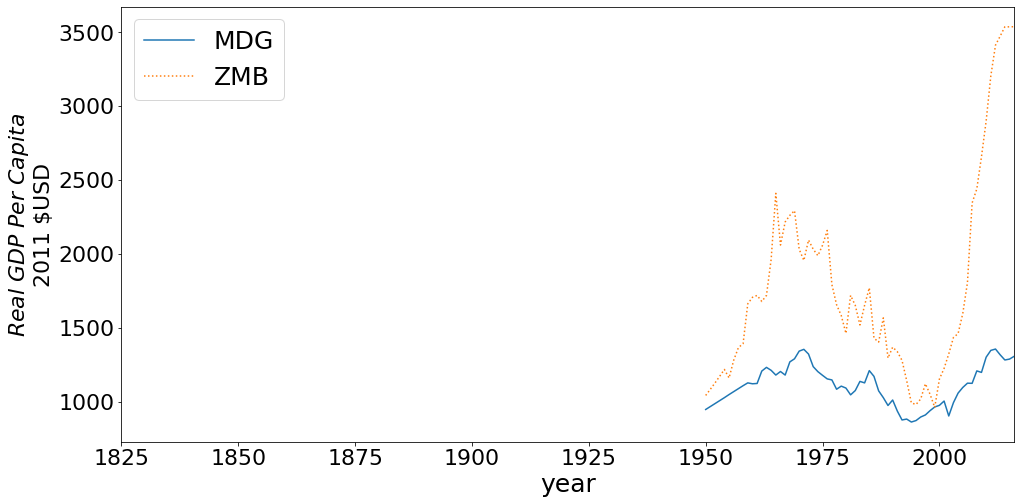

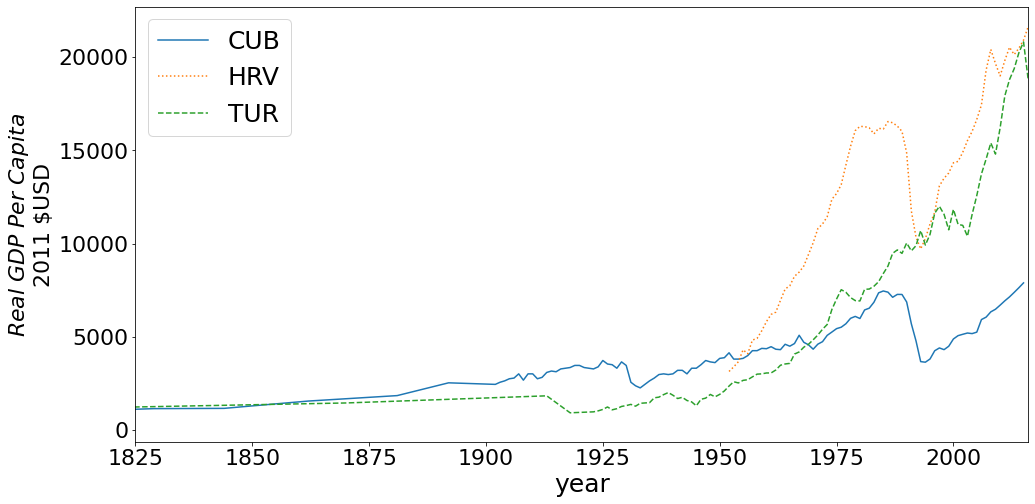

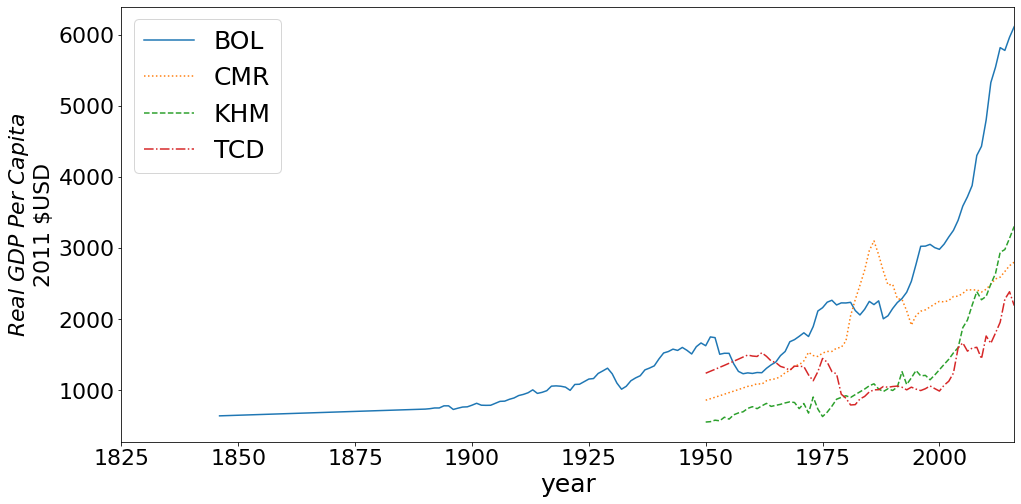

In [5]:
c2 = random_country_tuple(2)
c3 = random_country_tuple(3)
c4 = random_country_tuple(4)

country_sets = [c2, c3, c4]
linestyles = ["-", ":","--","-."]

# set graph global parameters
plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})  
plt.rcParams.update({"font.size": 25})  

for item in country_sets:
    fig, ax = plt.subplots(figsize = (16,8))
    for i in range(len(item)):   # how many countries are in your item grouping?
        country = item[i]
        linestyle = linestyles[i] # match linestyle to it's position within the group of countries.
        df.loc[country, :]   # this is clever... is 
        
        # the following line = log_y() ;)
        #data.loc[country,:]["cgdppc"].dropna().plot.line(ax = ax,  label = country, linestyle = linestyle, logy=True) 
        
        # the following line includes changing the font size... use this as needed.
        df.loc[country,:]["cgdppc"].dropna().plot.line(ax = ax,  label = country, linestyle = linestyle, fontsize = 22) 
        plt.xlim([1825, max(years)])
        plt.ylabel("$Real$ $GDP$ $Per$ $Capita$\n2011 \$USD",fontsize=22)  
    plt.legend()  
    plt.show()  
    plt.close()  

## Now... Merging Data with a Double Index

In [6]:
# read in another dataset...
fraser = pd.read_csv("cleanedEconFreedomData.csv",index_col = [0,1],parse_dates = False)

# Yeah, we're gonna drop nulls/nan now...
fraser.dropna(axis=0, how="all", inplace=True)

In [7]:
# See that the fraser dataset and the existing df have the same primary key structures (indexes)
print('First index of Fraser dataset looks like:', fraser.index[0], 'and first index of df looks like:',df.index[0])

First index of Fraser dataset looks like: ('ALB', 2017) and first index of df looks like: ('AFG', 1820)


#### Gotta Remember Later...
That if you're dealing with multiple dataframes with same indexes, you certainly can "copy" a column from one to another and that looks like the code below:

In [8]:
fraser['RGDP per Capita'] = df['rgdpnapc']
fraser

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP per Capita  
ISO_Code Year                   
ALB      2017              NaN  
         2016          10342.0  
         2015          10032.0  
         2014           9808.0  
         2013           9660.0  
...                        ...  
ZWE      2000           2249.0  
         1995           2156.0  
         1990           2232.0  
         1985           2198.0  
         1980           2133.0  

[3030 rows x 7 columns]

In [9]:
# write the merged Fraser and Maddison (df) datasets to file...
fraser.to_csv("fraserDataWithRGDPC.csv")

In [10]:
# copy fraser df to a new df
data = fraser

### Authoring Function to Create "Indicator" Variables

Prof. Caton refers to indicator variables... 

To me... "indicator" is simply setting a new column as a bit/binary, then applying to rule to another set oc daeta to determine if the value in that row/column **IS** OR **IS NOT** meeting the rule.  So, Is this crop a Burbank variety crop or not.. then add a new column called IsBurbank, as set the values as 0 / 1.

In [11]:
def create_feature_variable(data, feature_name, index_name, target_index_list):  
    #set default value to 0; in other cases you might chose True/1... depending on what you're doing
    data[feature_name] = 0  
    # set the desired items to 1/True!
    data.loc[target_index_list, [feature_name]] = int(1)

In [12]:
data.index

MultiIndex([('ALB', 2017),
            ('ALB', 2016),
            ('ALB', 2015),
            ('ALB', 2014),
            ('ALB', 2013),
            ('ALB', 2012),
            ('ALB', 2011),
            ('ALB', 2010),
            ('ALB', 2009),
            ('ALB', 2008),
            ...
            ('ZWE', 2005),
            ('ZWE', 2004),
            ('ZWE', 2003),
            ('ZWE', 2002),
            ('ZWE', 2001),
            ('ZWE', 2000),
            ('ZWE', 1995),
            ('ZWE', 1990),
            ('ZWE', 1985),
            ('ZWE', 1980)],
           names=['ISO_Code', 'Year'], length=3030)

In [13]:
data.index.names

FrozenList(['ISO_Code', 'Year'])

In [14]:
countries = list(data.groupby('ISO_Code').mean().index)

index_name = data.index.names[0]
feature_column_name = 'isRandomlySelected'
randomly_selected_countries = random_country_list(6)
print(randomly_selected_countries)


create_feature_variable(
    data = data,
    feature_name = feature_column_name,
    index_name = index_name,
    target_index_list = randomly_selected_countries
)
data


['COD', 'ISR', 'MDA', 'PHL', 'ROU', 'VNM']


EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP per Capita  isRandomlySelected  
ISO_Code Year                                       
ALB      2017              NaN                   0  
         2016          10342.0                   0  
         2015          10032.0                   0  
         2014           9808.0                   0  
         2013           9660.0                   0  
...                        ...                 ...  
ZWE      2000           2249.0                   0  
         1995           2156.0                   0  
         1990           2232.0                   0  
         1985           2198.0                   0  
         1980           2133.0                   0  

[3030 rows x 8 columns]

In [15]:
# See the format here: df.loc[index, [key1...]]
data.loc['USA', ['isRandomlySelected']]

isRandomlySelected
Year                    
2017                   0
2016                   0
2015                   0
2014                   0
2013                   0
2012                   0
2011                   0
2010                   0
2009                   0
2008                   0
2007                   0
2006                   0
2005                   0
2004                   0
2003                   0
2002                   0
2001                   0
2000                   0
1995                   0
1990                   0
1985                   0
1980                   0
1975                   0
1970                   0

### Let's plot... 

In [16]:
import datetime
calendarYear = 2000

plot_data = data[
    data.index.get_level_values("Year") == calendarYear
]

plot_data


EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2000  6.296170            7.260723                        4.585351   
DZA      2000  4.796785            4.236876                        3.295760   
ARG      2000  7.218572            8.001421                        4.757417   
AUS      2000  8.105358            6.815197                        8.530602   
AUT      2000  8.002885            5.464242                        8.613877   
...                 ...                 ...                             ...   
USA      2000  8.518073            7.376862                        8.472453   
URY      2000  6.993437            6.371031                        5.758478   
VEN      2000  5.683733            5.715487                        3.916083   
ZMB      2000  6.360364            6.084279                        5.286878   
ZWE      2000  4.299839            5.365058                        4.662445   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2000     7.396284                          5.948380    6.290114   
DZA      2000     7.003710                          5.263068    4.184510   
ARG      2000     9.709159                          7.451847    6.173016   
AUS      2000     9.402096                          7.811404    7.967489   
AUT      2000     9.627837                          8.966296    7.342173   
...                    ...                               ...         ...   
USA      2000     9.777079                          8.399517    8.564456   
URY      2000     8.393894                          8.166681    6.277104   
VEN      2000     5.559516                          7.741570    5.486009   
ZMB      2000     7.150426                          7.274558    6.005681   
ZWE      2000     2.891166                          3.224735    5.355792   

               RGDP per Capita  isRandomlySelected  
ISO_Code Year                                       
ALB      2000           5097.0                   0  
DZA      2000          10528.0                   0  
ARG      2000          15119.0                   0  
AUS      2000          39200.0                   0  
AUT      2000          36363.0                   0  
...                        ...                 ...  
USA      2000          45887.0                   0  
URY      2000          12932.0                   0  
VEN      2000          14904.0                   0  
ZMB      2000           1990.0                   0  
ZWE      2000           2249.0                   0  

[123 rows x 8 columns]

Text(0.5, 1.0, '2000')

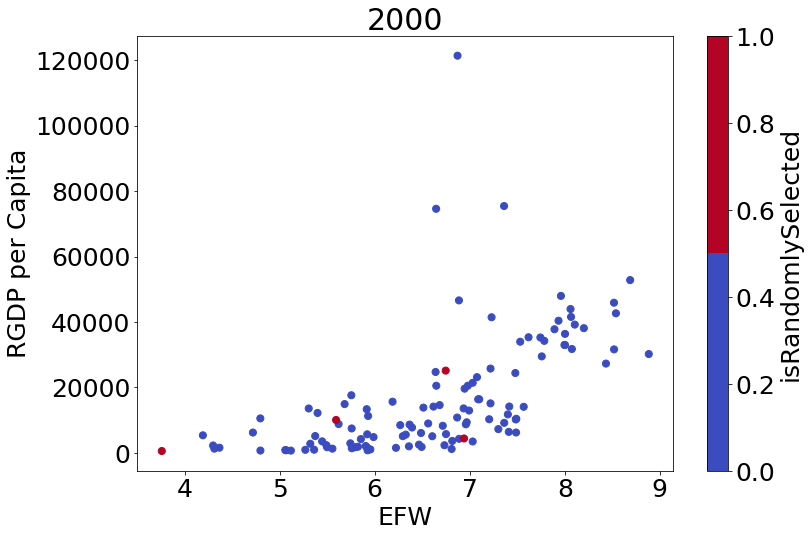

In [17]:
from matplotlib import cm
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)


fig, ax = plt.subplots(figsize = (12,8))
plot_data.plot.scatter(
    x = "EFW",
    y = "RGDP per Capita",
    c = 'isRandomlySelected',
    #cmap = "coolwarm",
    cmap = cmap, 
#     norm = norm,
    ax=ax,
    s=50
)

ax.set_title(str(calendarYear), fontsize = 30)

### Group by Quantile

In [18]:
# choose numbers of divisions  
n = 5  

#create column identifying n-tile rank  
quantile_var = "RGDP per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

In [19]:
def create_quantile(n, data, year, quantile_var, quantile_name):      
    # index that indentifies countries for a given year  
    year_index = data.index.get_level_values("Year") == year  
    year_data = data[year_index][quantile_var]
    quantile_values_dict = {i:year_data.quantile(i/n) for i in range(1, n + 1)}  
    # cycle through each country for a given year  
    for index in data[year_index].index:  
        # identtify value of the variable of interest  
        val = data.loc[index][quantile_var]  
        # compare that value to the values that divide each quantile  
        for i in range(1, n + 1):  
            # if the value is less than the highest in the quantile identified,  
            # save quantile as i  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)  
                #exit loop  
                break  
            # otherwise check the higest value of the next quantile  
            else:  
                 continue  

In [20]:
years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

In [21]:
data[["RGDP per Capita", "RGDP per Capita 5-tile"]]

RGDP per Capita  RGDP per Capita 5-tile
ISO_Code Year                                         
ALB      2017              NaN                     NaN
         2016          10342.0                     3.0
         2015          10032.0                     3.0
         2014           9808.0                     3.0
         2013           9660.0                     3.0
...                        ...                     ...
ZWE      2000           2249.0                     5.0
         1995           2156.0                     5.0
         1990           2232.0                     5.0
         1985           2198.0                     5.0
         1980           2133.0                     5.0

[3030 rows x 2 columns]

In [22]:
data.columns

Index(['EFW', 'Size of Government', 'Legal System & Property Rights',
       'Sound Money', 'Freedom to trade internationally', 'Regulation',
       'RGDP per Capita', 'isRandomlySelected', 'RGDP per Capita 5-tile'],
      dtype='object')

In [23]:
data

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP per Capita  isRandomlySelected  RGDP per Capita 5-tile  
ISO_Code Year                                                               
ALB      2017              NaN                   0                     NaN  
         2016          10342.0                   0                     3.0  
         2015          10032.0                   0                     3.0  
         2014           9808.0                   0                     3.0  
         2013           9660.0                   0                     3.0  
...                        ...                 ...                     ...  
ZWE      2000           2249.0                   0                     5.0  
         1995           2156.0                   0                     5.0  
         1990           2232.0                   0                     5.0  
         1985           2198.0                   0                     5.0  
         1980           2133.0                   0                     5.0  

[3030 rows x 9 columns]

Text(0.5, 1.0, 'Year: 2016')

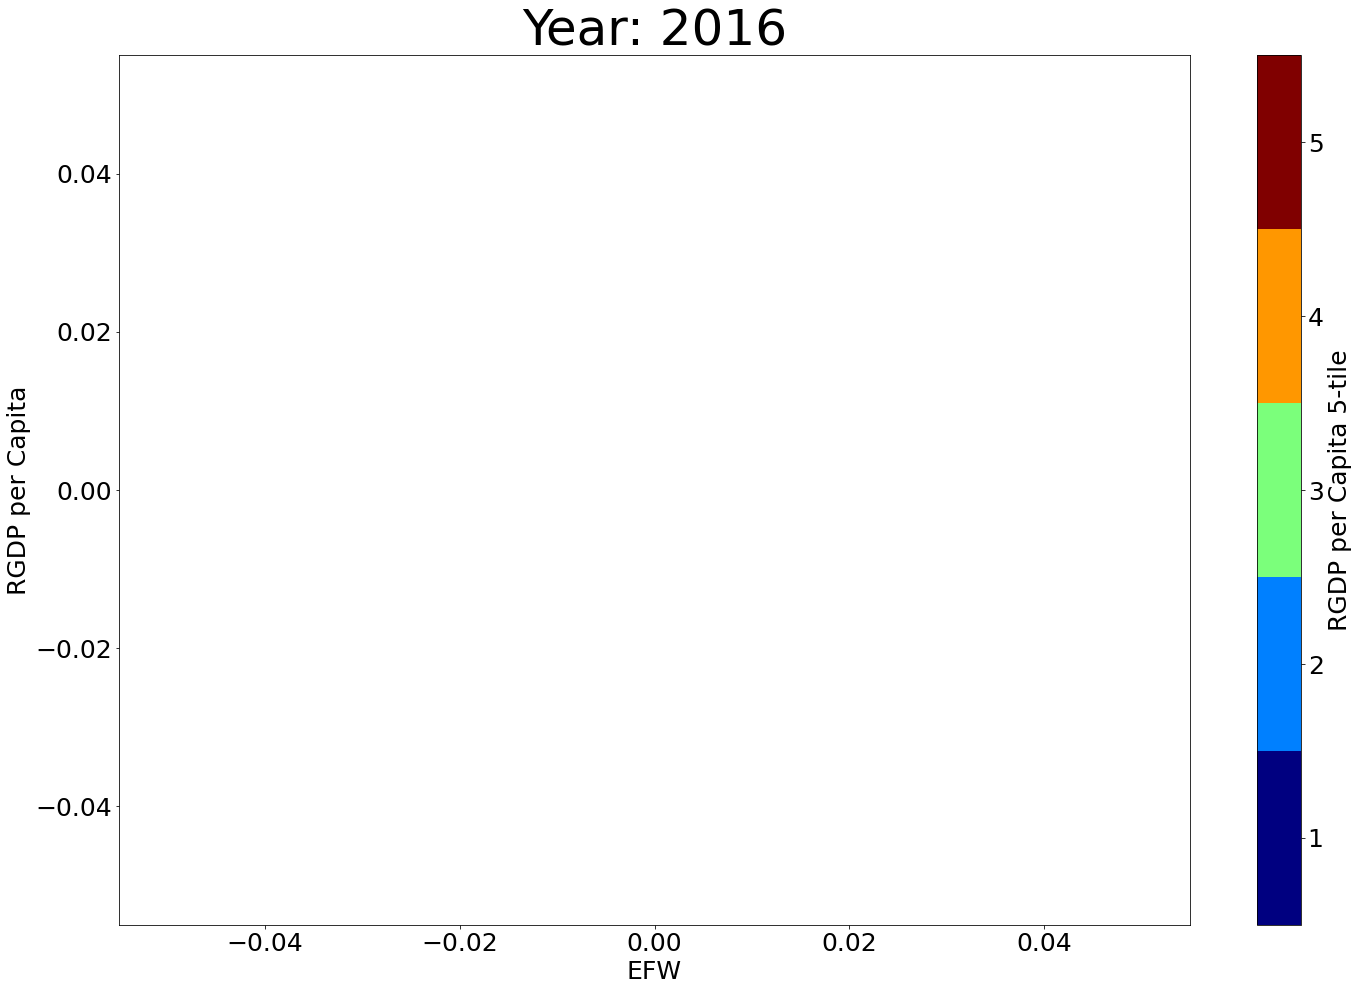

In [24]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2016
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))

# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm = norm)  #, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", y = "RGDP per Capita", 
                       c = "RGDP per Capita " + str(n) + "-tile",
                       cmap = cmap, 
#                        norm = norm,
                       ax = ax, 
                       s = 50,
                       legend = False, 
                       vmin = 0.5, 
                       vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)

### Lag Variables and Differenced Log Values

With time series data, it is often useful to control for trends when data is autocorrelated. Consider, for example, that real GDP data is often highly correlated with values from the previous period. We might detect a false causal relationship between two variables that are actually unrelated but follow a similar trend. For example, we might regress your age against real GDP and find that there is a strong correlation between the two. To avaoid false positives like this, it is useful to account for the influence of lagged values and/or to detrend the data all together by using differenced logs.

Creating lag variables is quite simple if the index is already recognized as containing dates and times. The method, *df.shift(n)* accomplishes this. Pass a negative value to create a lagged variable from n periods previous and a positive value to create a variable that refers to data n periods in the future.

Because we are using a double index, we must specify to which index we must instruct Pandas as to which index the shift refers. We accomplish this by using *.groupby(level)* to target the index column that does not refer to a datetime data. This will group the data by entity, thus leaving only the date column to be referenced by *.shift(n)*. Since we only want a lag value from the period that immediately preceded the observation, *n=-1*.

### World Health Organization Adult Mortality Rate
[World Health Organization Adult Mortality Rates (15 - to 60)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/adult-mortality-rate-(probability-of-dying-between-15-and-60-years-per-1000-population))

In [25]:
# Add WHO adult mortality index to dataset
mortality = pd.read_csv("mortality.csv",index_col = [0,2])
mortality = mortality[mortality['mortality_type'] == 'BTSX']
mortality.drop(['country', 'mortality_type'], axis = 'columns', inplace=True)
data['MortalityIndex'] = mortality['MortalityIndex']

# Filter the dataframe by the Year index; values >= Year 2000.
data = data[data.index.get_level_values('Year') >= 2000]


In [26]:
keys = data.keys()
for key in keys:  
    if "GDP" in key:  
        data[key + " Lag"] = data[key].groupby("ISO_Code").shift()
        data["Log " + key] = np.log(data[key])  
        data["Log " + key + " Lag"] = data["Log " + key].groupby("ISO_Code").shift()
        
        
# so initialize the diff data as the dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff().dropna().index  
data_dict = {}  
data_dict["Data"] = data  

data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby("ISO_Code").diff() 
data_dict["Diff Data"].dropna(inplace = True)  



for key in data_dict:  
    data = data_dict[key]    
    data['isExcessMortality'] = np.where(data['MortalityIndex'].abs() > 5,1,0)
    
#     create_indicator_variable(data = data, indicator_name = indicator_name,  
#         index_name = index_name,target_index_list = countries_in_north_america)  

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22940/3356403621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[key + " Lag"] = data[key].groupby("ISO_Code").shift()
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22940/3356403621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Log " + key] = np.log(data[key])
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22940/3356403621.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [27]:
data_dict[key]

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2014 -0.052896           -0.022220                       -0.336748   
         2013 -0.197245           -0.074133                       -0.122958   
         2012 -0.057193            0.288471                       -0.072290   
         2011  0.048732           -0.275409                        0.403390   
         2010 -0.000338            0.018699                        0.380981   
...                 ...                 ...                             ...   
ZWE      2004  0.291817            0.893369                        0.108099   
         2003  0.494203            0.524706                       -0.174357   
         2002 -0.049776           -0.194706                       -0.016127   
         2001  0.008006            0.032941                       -0.094124   
         2000  0.666350           -0.182353                        1.351345   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2014     0.043694                          0.099512   -0.048719   
         2013     0.061623                         -0.502859   -0.347895   
         2012     0.019798                         -0.590349    0.068405   
         2011     0.064519                          0.003521    0.047639   
         2010    -0.050237                          0.127981   -0.479114   
...                    ...                               ...         ...   
ZWE      2004     0.000000                          0.199055    0.258565   
         2003     1.250000                          0.552497    0.318168   
         2002     0.000000                         -0.117556    0.079507   
         2001     0.452366                          0.182173   -0.533328   
         2000     1.188800                          0.039952    0.934008   

               RGDP per Capita  isRandomlySelected  RGDP per Capita 5-tile  \
ISO_Code Year                                                                
ALB      2014           -224.0                 0.0                     0.0   
         2013           -148.0                 0.0                     0.0   
         2012            -68.0                 0.0                     0.0   
         2011           -108.0                 0.0                     0.0   
         2010           -212.0                 0.0                     0.0   
...                        ...                 ...                     ...   
ZWE      2004            112.0                 0.0                     0.0   
         2003            100.0                 0.0                     0.0   
         2002            332.0                 0.0                     0.0   
         2001            174.0                 0.0                     0.0   
         2000             21.0                 0.0                     0.0   

               MortalityIndex  RGDP per Capita Lag  Log RGDP per Capita  \
ISO_Code Year                                                             
ALB      2014            6.08               -310.0            -0.022582   
         2013            1.98               -224.0            -0.015205   
         2012            2.90               -148.0            -0.007064   
         2011            0.00                -68.0            -0.011323   
         2010            0.30               -108.0            -0.022607   
...                       ...                  ...                  ...   
ZWE      2004           13.30                 43.0             0.071550   
         2003            2.50                112.0             0.059826   
         2002           -2.10                100.0             0.176303   
         2001           -7.20                332.0             0.081315   
         2000          -12.30                174.0             0.009381   

            

In [28]:
## Panel Regression

Data
Entity = True
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0756
Estimator:                    PanelOLS   R-squared (Between):              0.1207
No. Observations:                 2116   R-squared (Within):               0.1404
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.1309
Time:                         16:11:15   Log-likelihood                    1879.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      31.877
Entities:                          162   P-value                           0.0000
Avg Obs:                        13.062   Distribution:                  F(5,1949)
Min Obs:                        0.0000                                           
Max Obs:                        16.000   F-statistic (robust):

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22940/1916389519.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\SAND8464\Anaconda3\lib\site-packages\linearmodels\panel\results.py:544: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  out_df: DataFrame = concat(out, 1)
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22940/1916389519.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"]

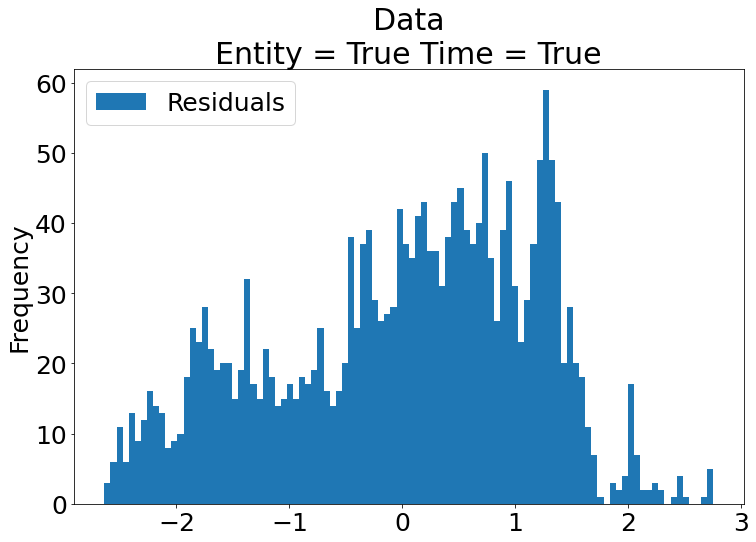

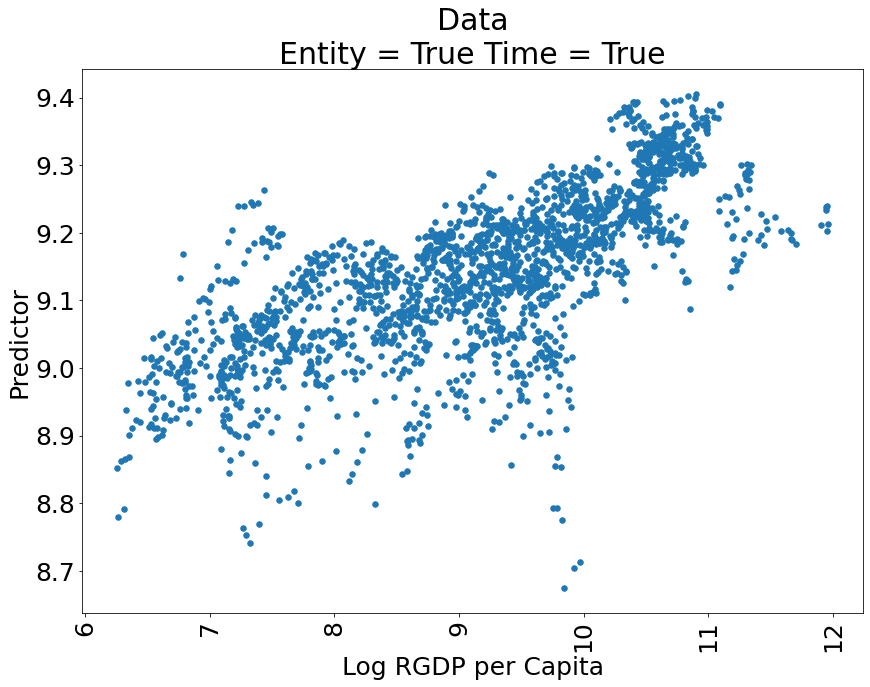

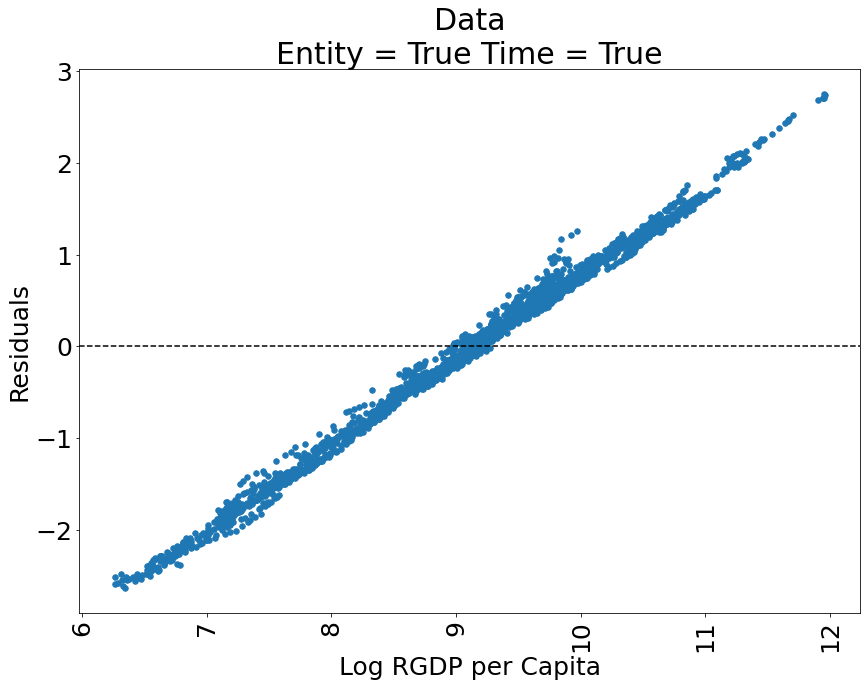

Data
Entity = True
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.2266
Estimator:                    PanelOLS   R-squared (Between):              0.1936
No. Observations:                 2116   R-squared (Within):               0.2266
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.2109
Time:                         16:11:15   Log-likelihood                    1363.6
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      115.06
Entities:                          162   P-value                           0.0000
Avg Obs:                        13.062   Distribution:                  F(5,1964)
Min Obs:                        0.0000                                           
Max Obs:                        16.000   F-statistic (robust)

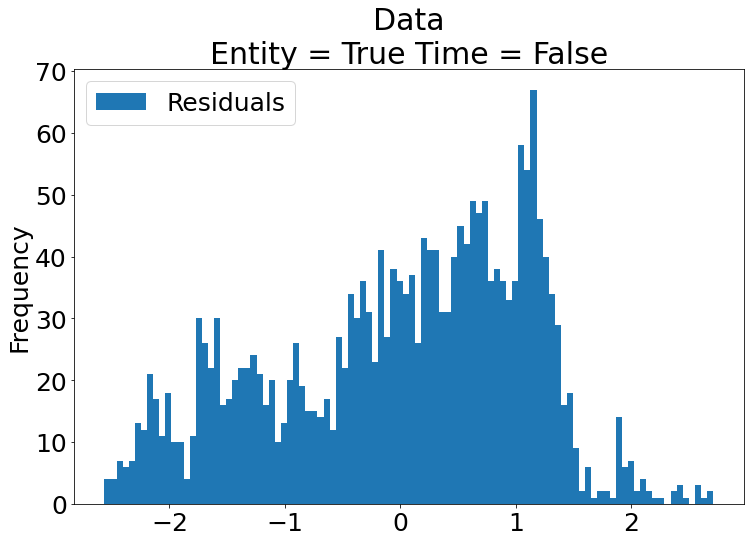

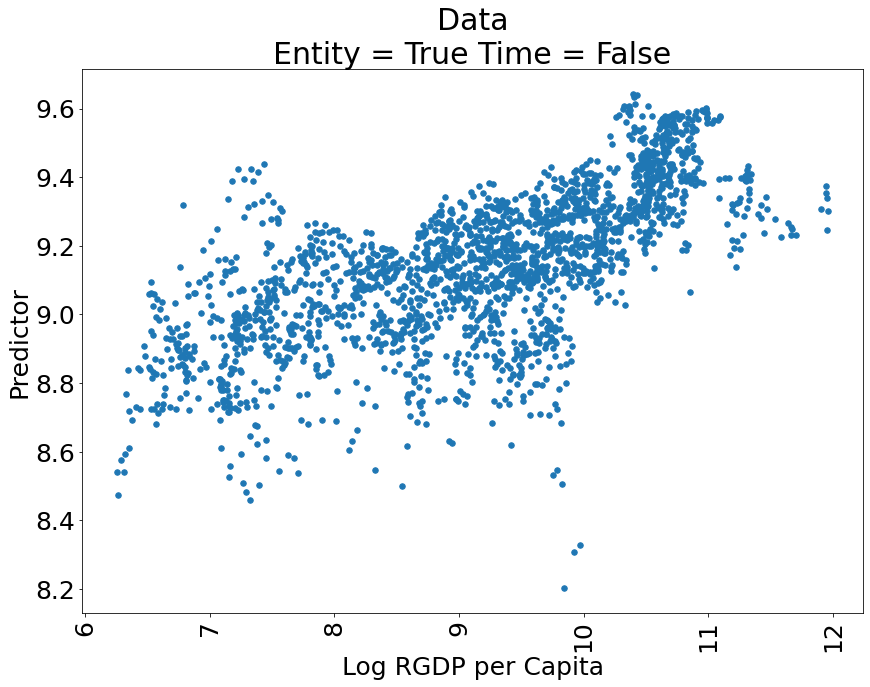

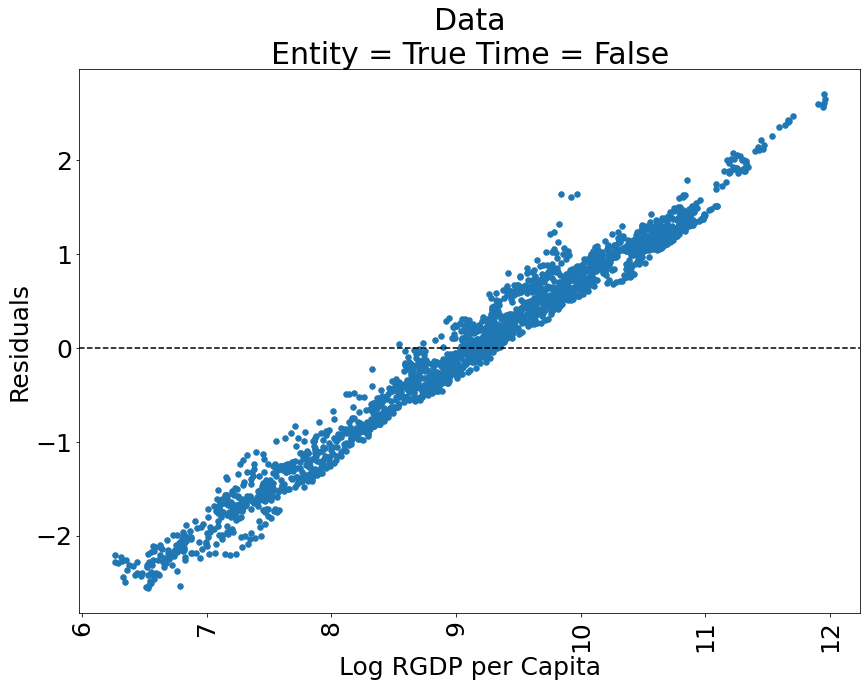

Data
Entity = False
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.6158
Estimator:                    PanelOLS   R-squared (Between):              0.6174
No. Observations:                 2116   R-squared (Within):              -1.5152
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.6141
Time:                         16:11:16   Log-likelihood                   -2432.0
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      671.70
Entities:                          162   P-value                           0.0000
Avg Obs:                        13.062   Distribution:                  F(5,2095)
Min Obs:                        0.0000                                           
Max Obs:                        16.000   F-statistic (robust)

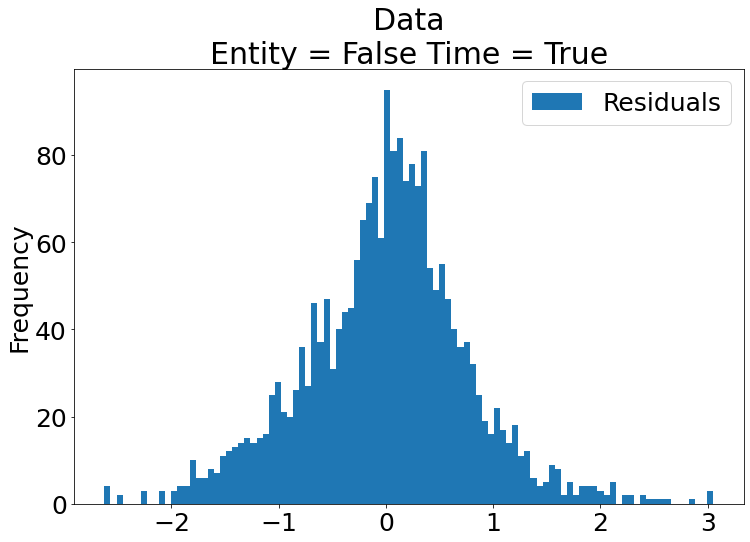

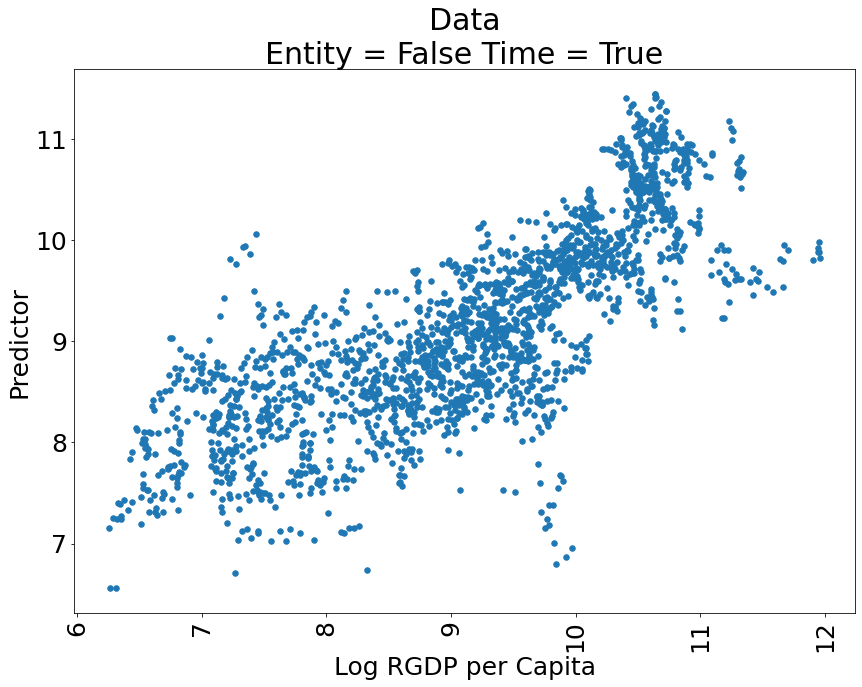

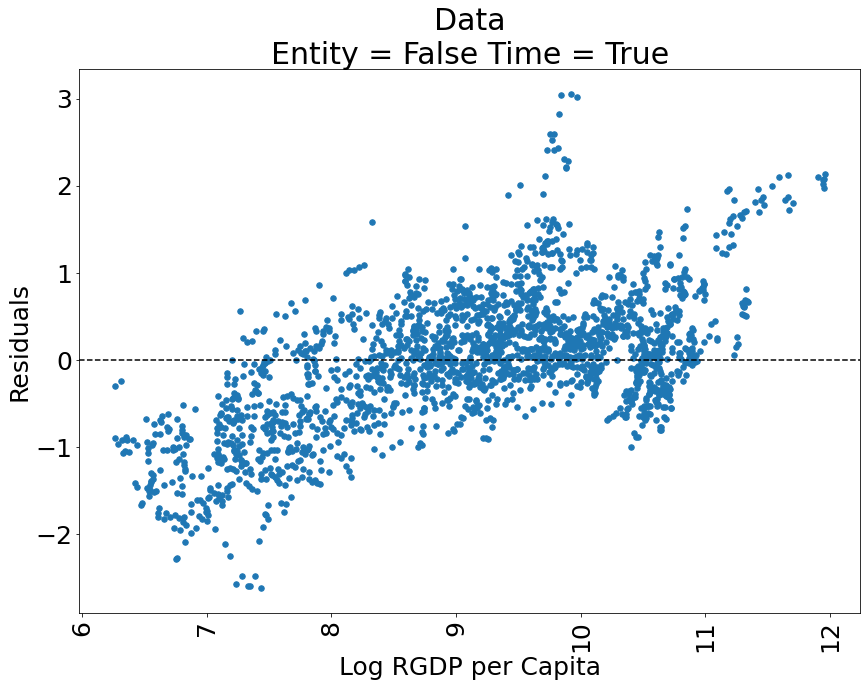

Data
Entity = False
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.6143
Estimator:                    PanelOLS   R-squared (Between):              0.6166
No. Observations:                 2116   R-squared (Within):              -1.4435
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.6143
Time:                         16:11:17   Log-likelihood                   -2439.1
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      672.23
Entities:                          162   P-value                           0.0000
Avg Obs:                        13.062   Distribution:                  F(5,2110)
Min Obs:                        0.0000                                           
Max Obs:                        16.000   F-statistic (robust

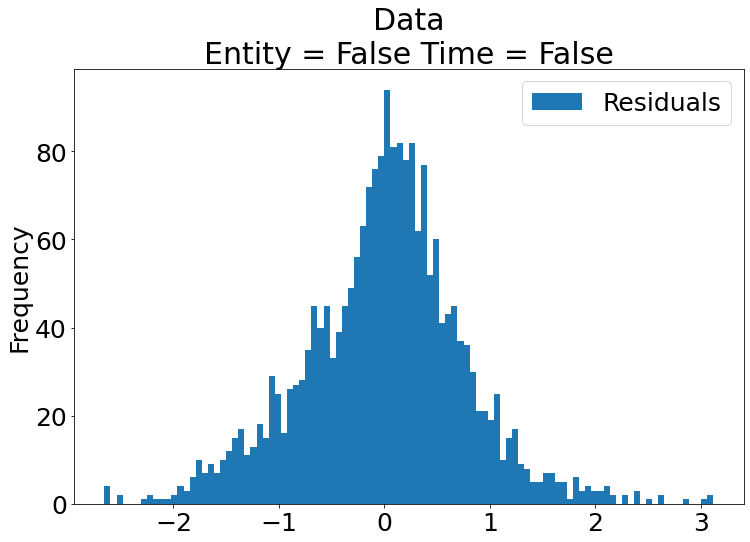

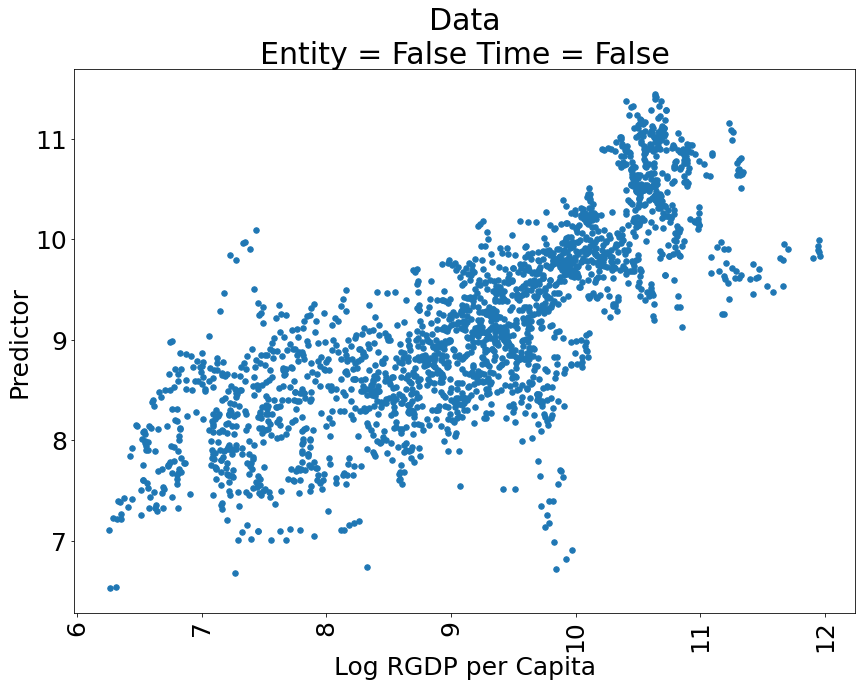

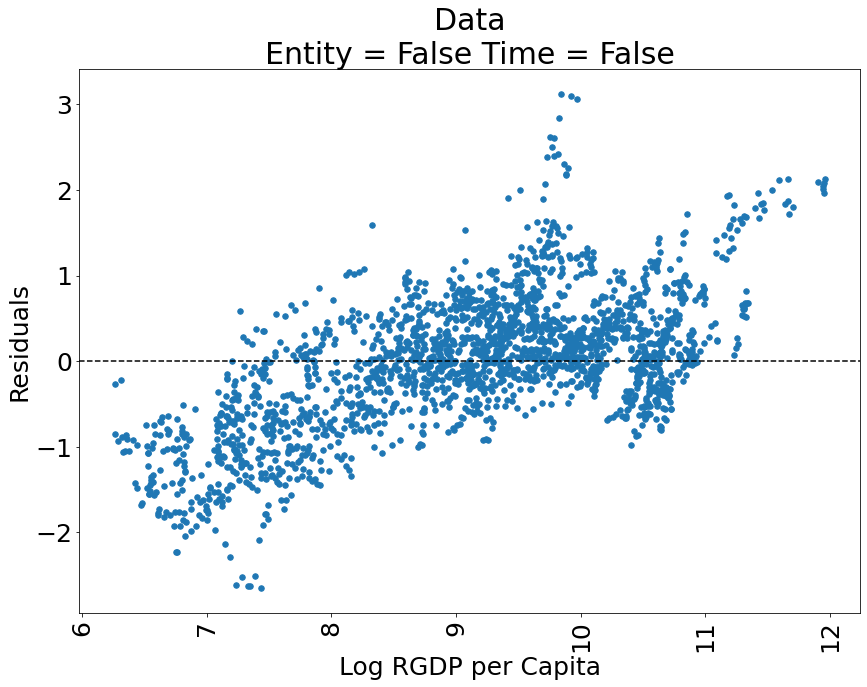

Diff Data
Entity = True
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0168
Estimator:                    PanelOLS   R-squared (Between):              0.0065
No. Observations:                 1969   R-squared (Within):               0.0165
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0188
Time:                         16:11:18   Log-likelihood                    3864.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      6.1712
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.154   Distribution:                  F(5,1803)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic

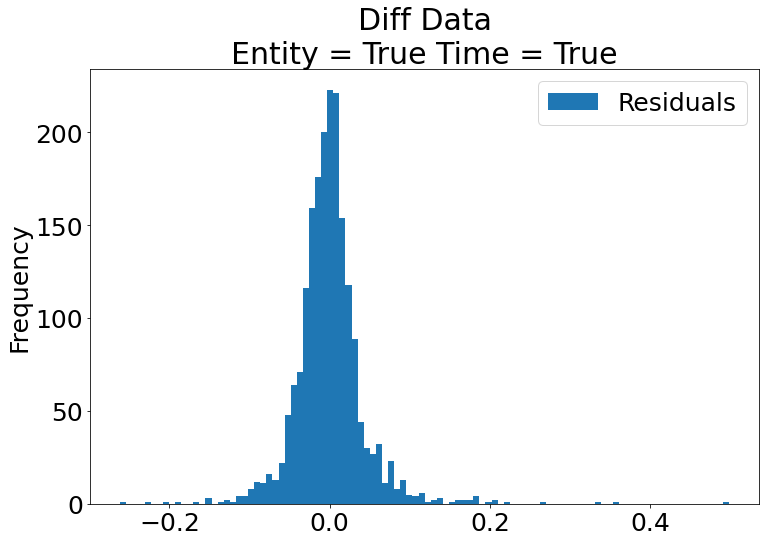

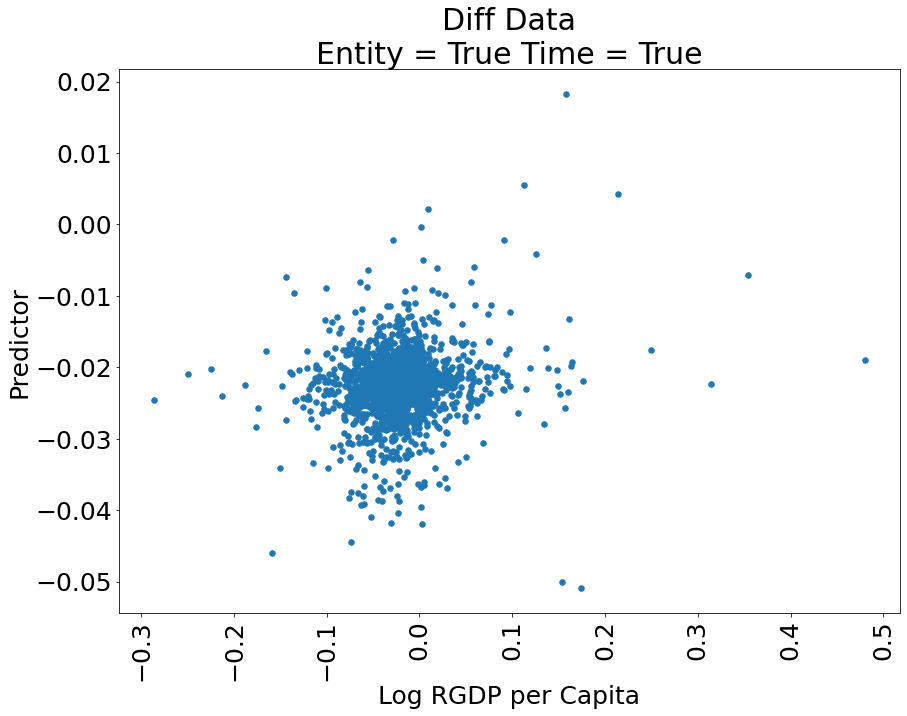

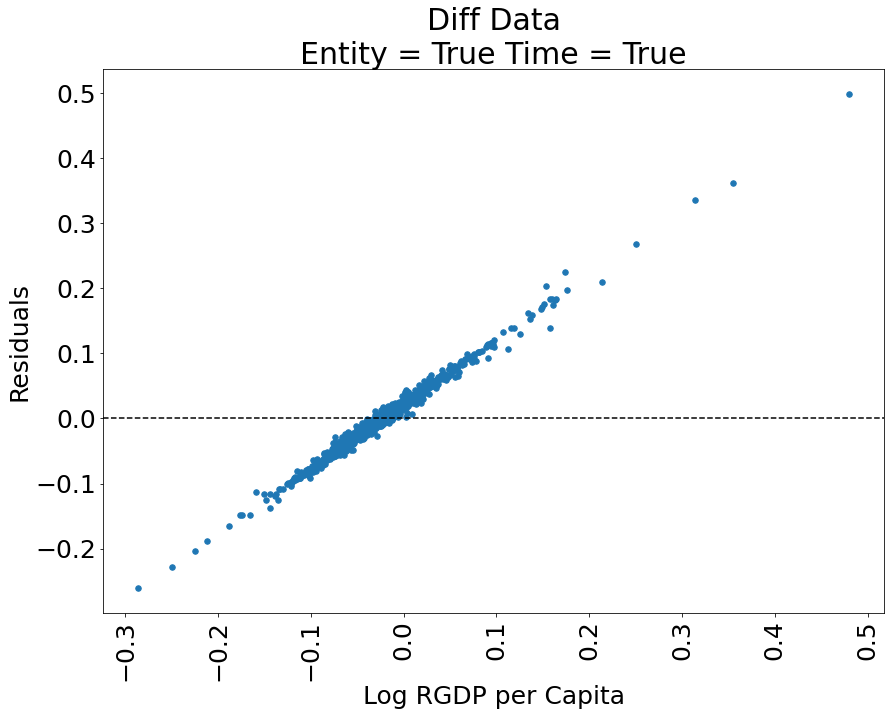

Diff Data
Entity = True
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0216
Estimator:                    PanelOLS   R-squared (Between):              0.0174
No. Observations:                 1969   R-squared (Within):               0.0216
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0248
Time:                         16:11:19   Log-likelihood                    3699.7
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.0187
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.154   Distribution:                  F(5,1817)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statisti

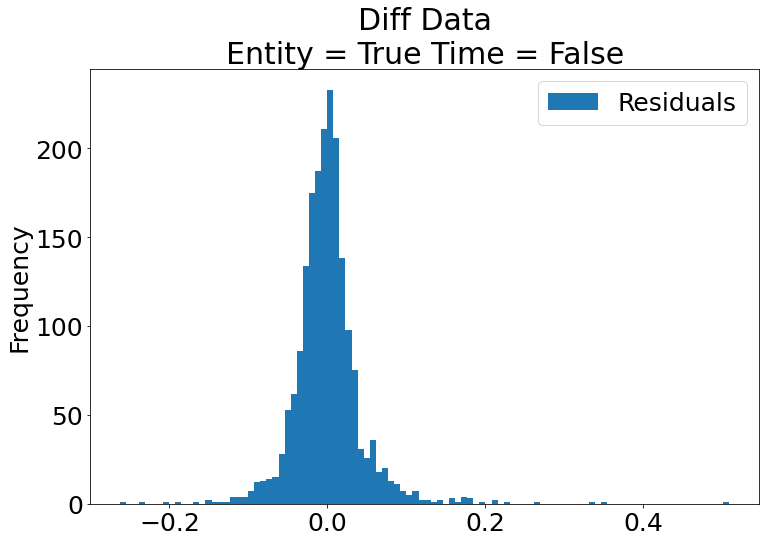

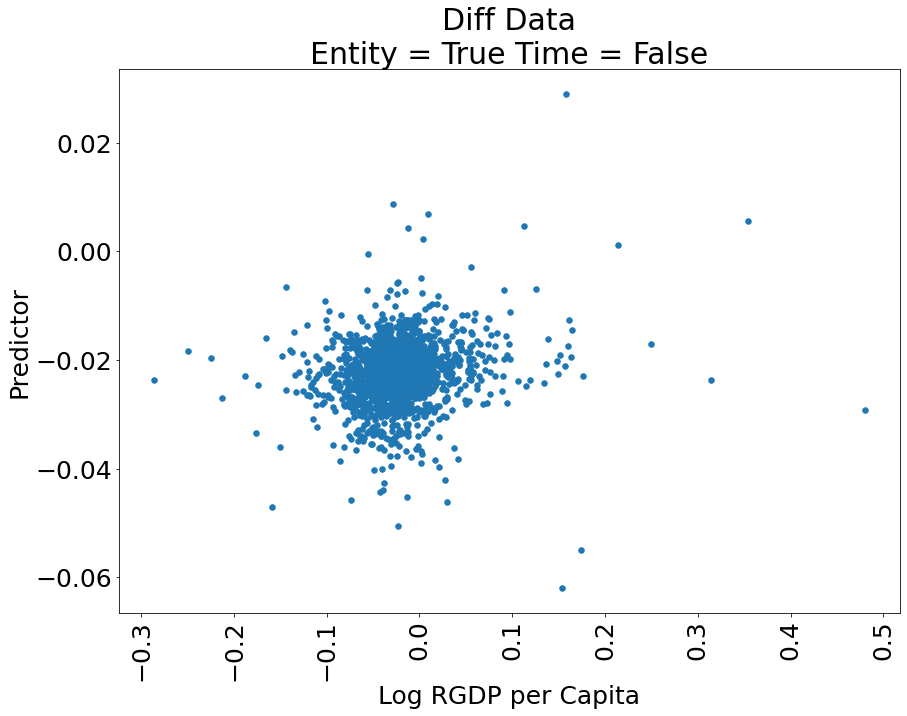

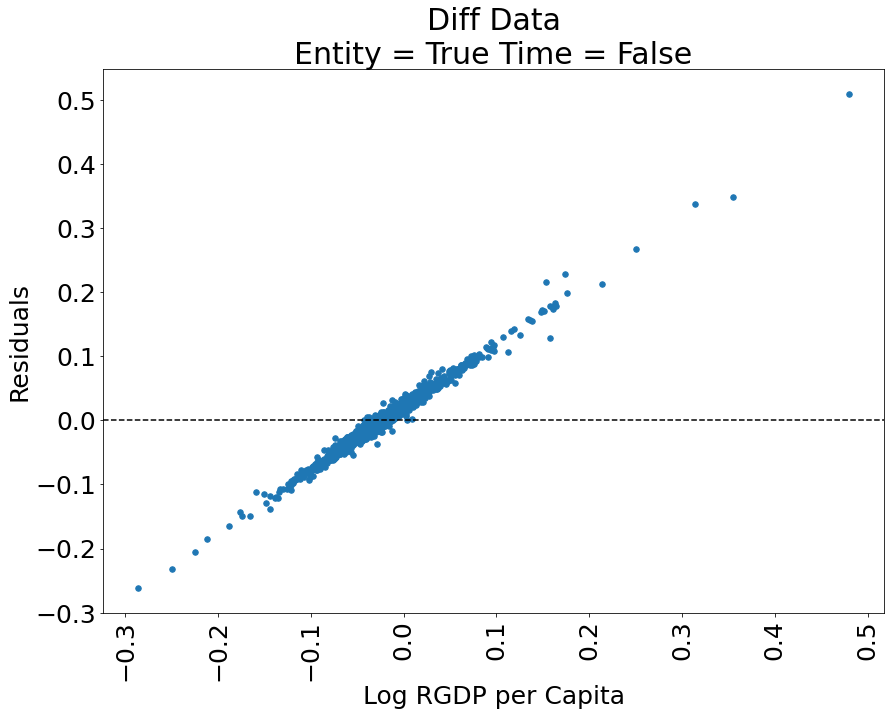

Diff Data
Entity = False
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0215
Estimator:                    PanelOLS   R-squared (Between):              0.0214
No. Observations:                 1969   R-squared (Within):               0.0175
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0233
Time:                         16:11:19   Log-likelihood                    3498.7
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.5722
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.154   Distribution:                  F(5,1949)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statisti

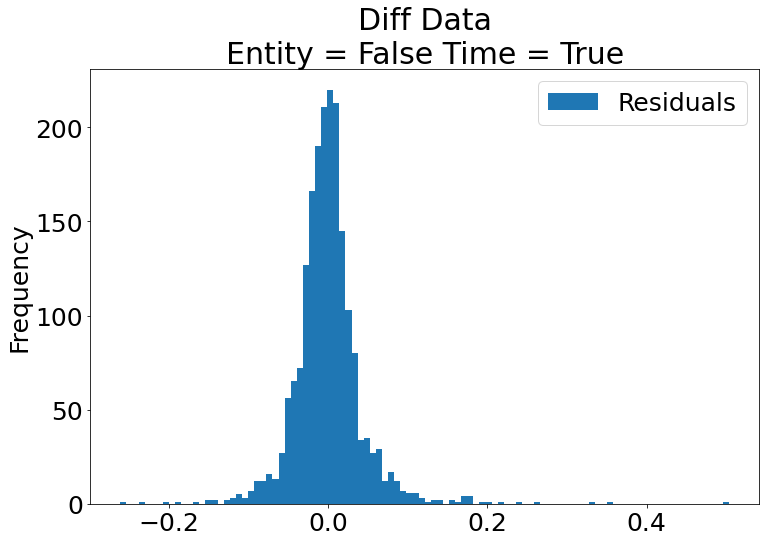

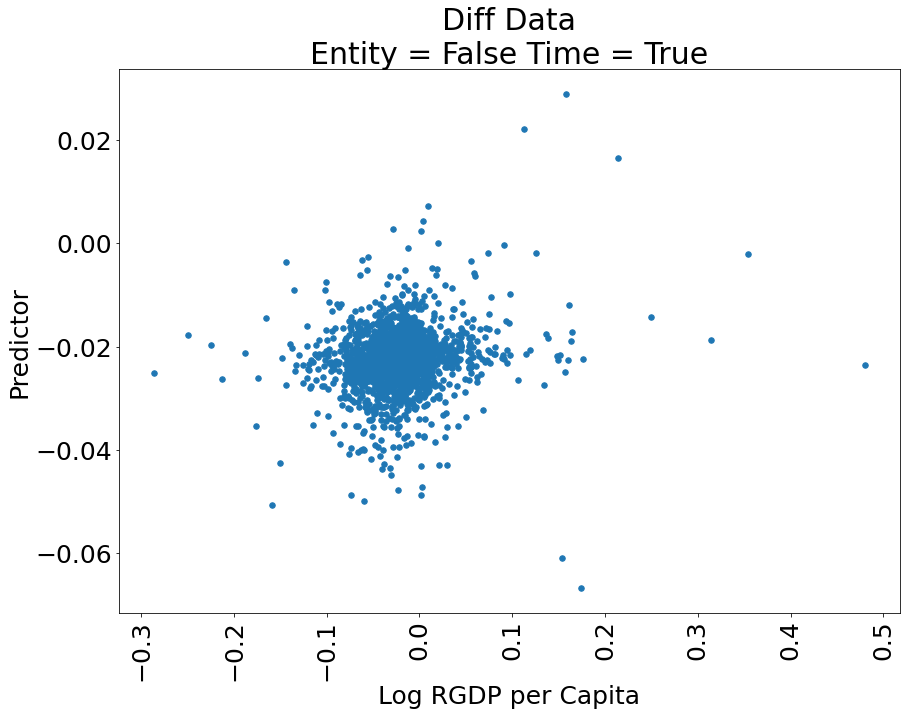

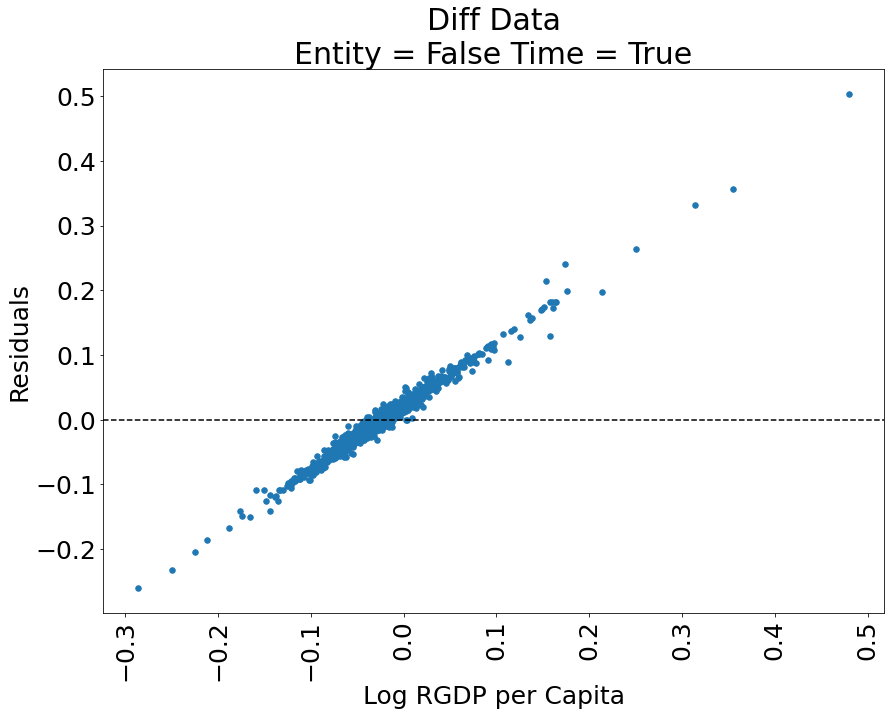

Diff Data
Entity = False
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0267
Estimator:                    PanelOLS   R-squared (Between):              0.0318
No. Observations:                 1969   R-squared (Within):               0.0192
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0267
Time:                         16:11:20   Log-likelihood                    3382.9
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      10.773
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.154   Distribution:                  F(5,1963)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statist

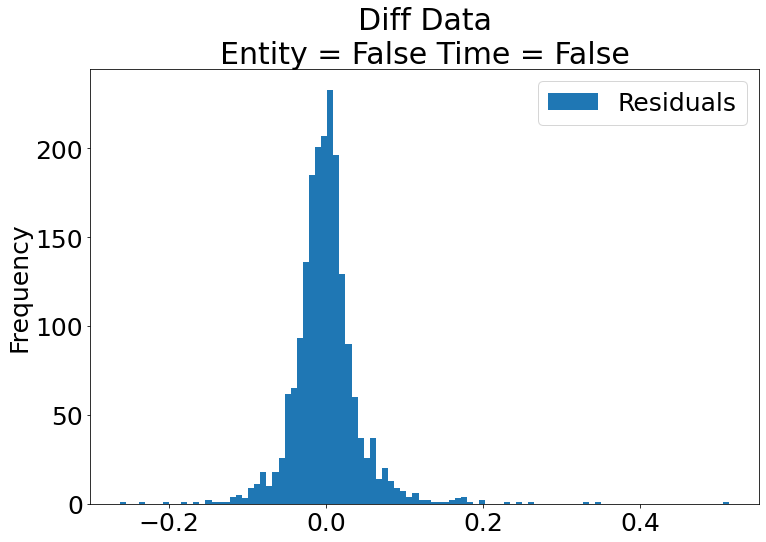

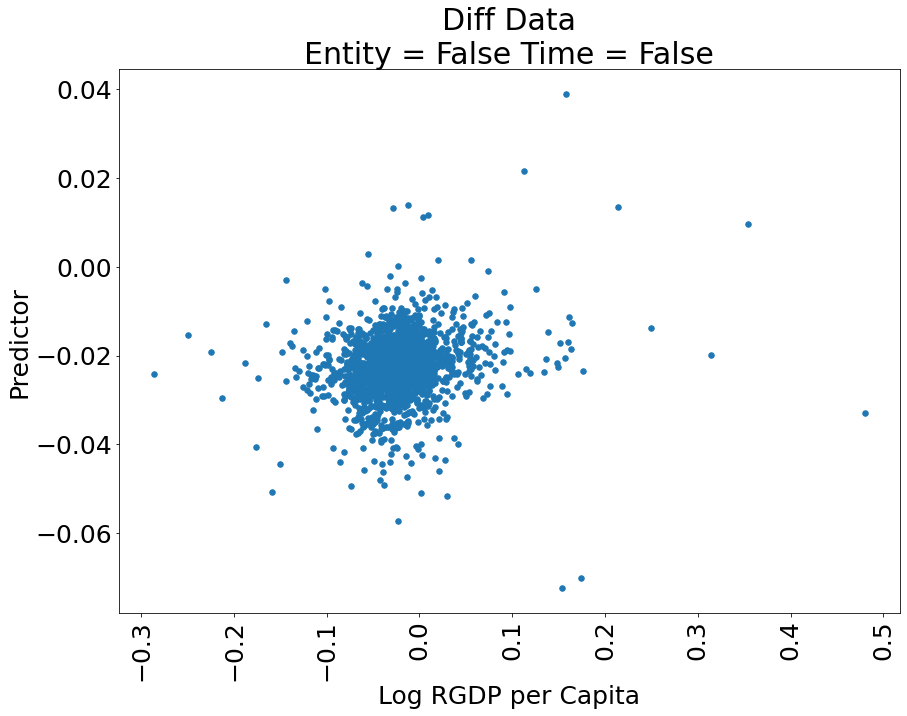

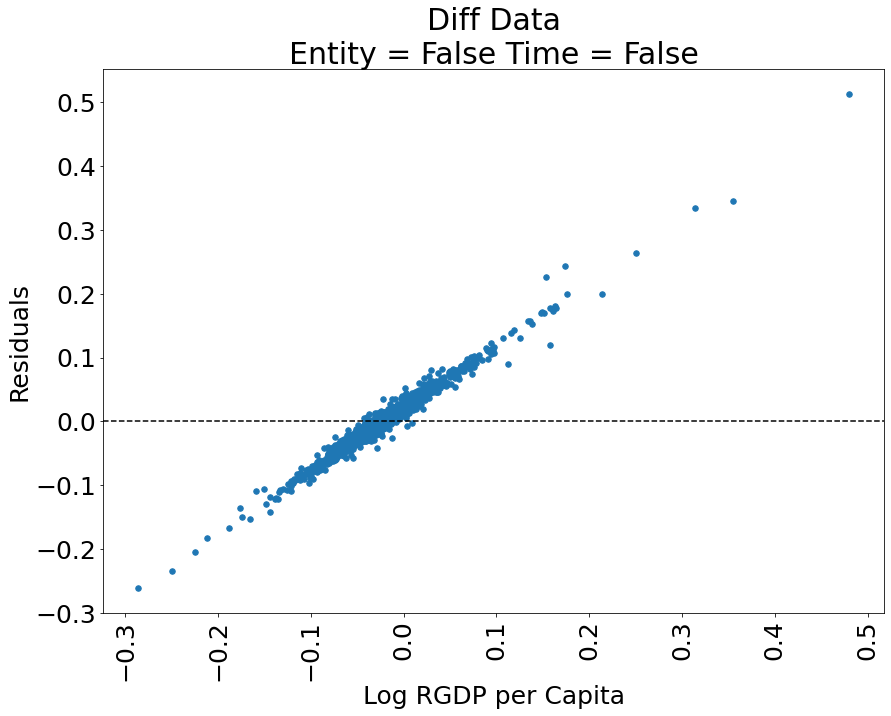

In [29]:
y_name = ["Log RGDP per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

## Add in new variable for Excess Mortality

Data
Entity = True
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0756
Estimator:                    PanelOLS   R-squared (Between):              0.1207
No. Observations:                 2116   R-squared (Within):               0.1404
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.1309
Time:                         16:11:21   Log-likelihood                    1879.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      31.877
Entities:                          162   P-value                           0.0000
Avg Obs:                        13.062   Distribution:                  F(5,1949)
Min Obs:                        0.0000                                           
Max Obs:                        16.000   F-statistic (robust):

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22940/1496659397.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22940/1496659397.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


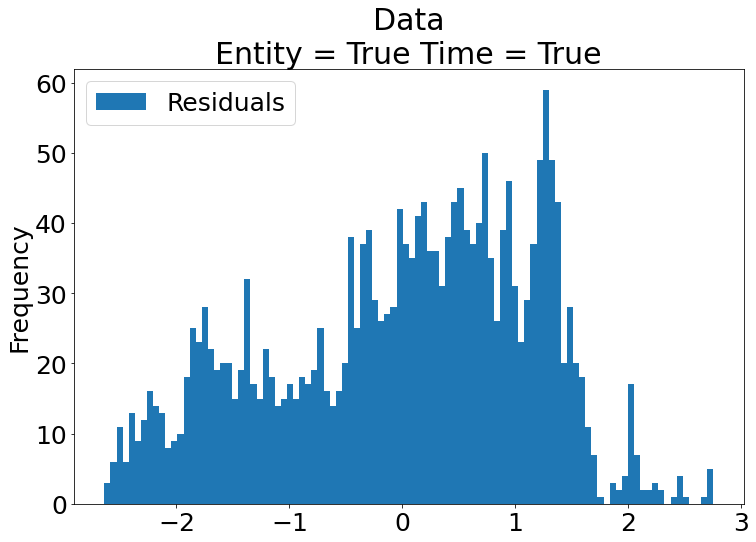

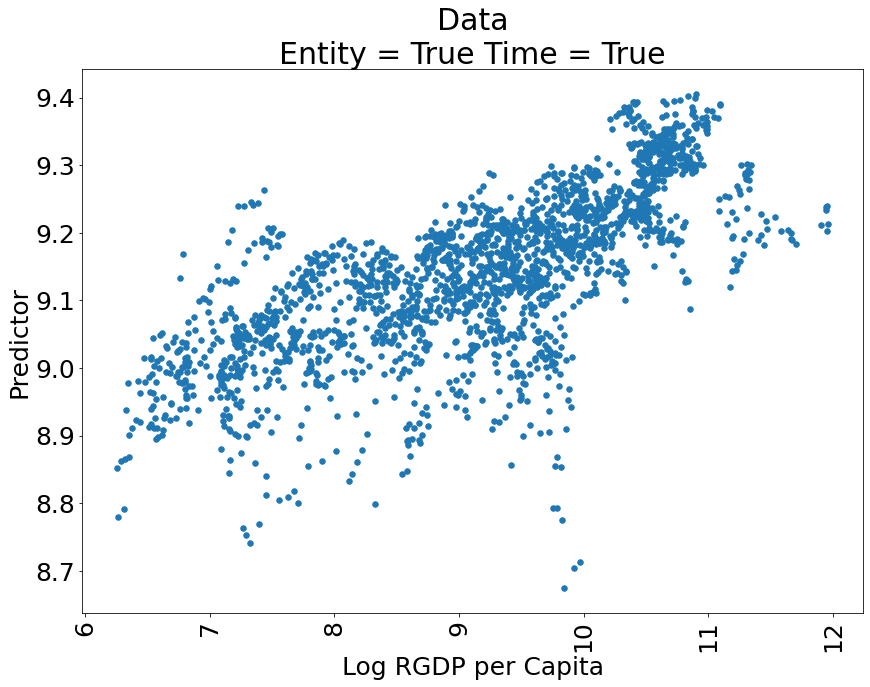

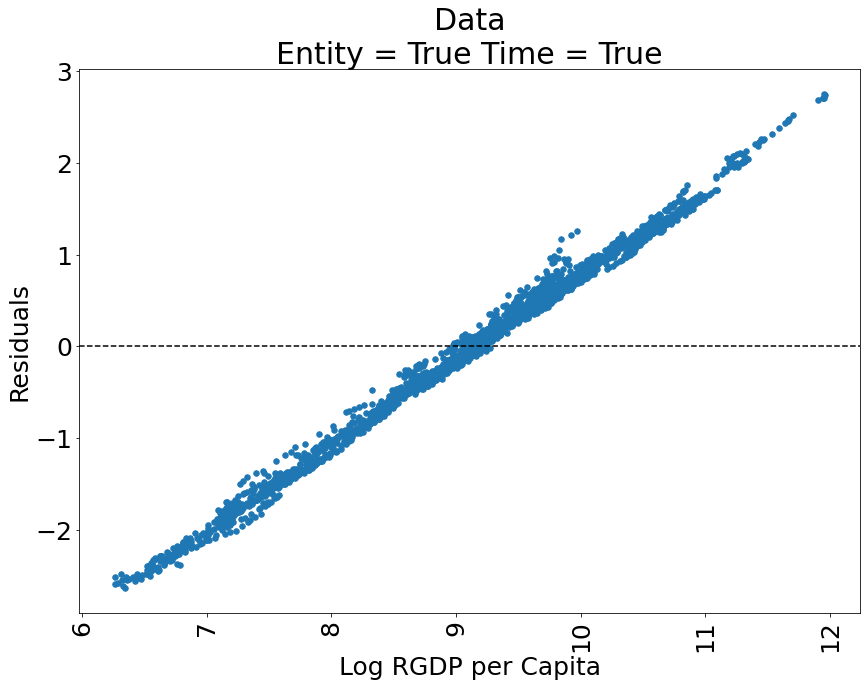

Data
Entity = True
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.2266
Estimator:                    PanelOLS   R-squared (Between):              0.1936
No. Observations:                 2116   R-squared (Within):               0.2266
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.2109
Time:                         16:11:22   Log-likelihood                    1363.6
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      115.06
Entities:                          162   P-value                           0.0000
Avg Obs:                        13.062   Distribution:                  F(5,1964)
Min Obs:                        0.0000                                           
Max Obs:                        16.000   F-statistic (robust)

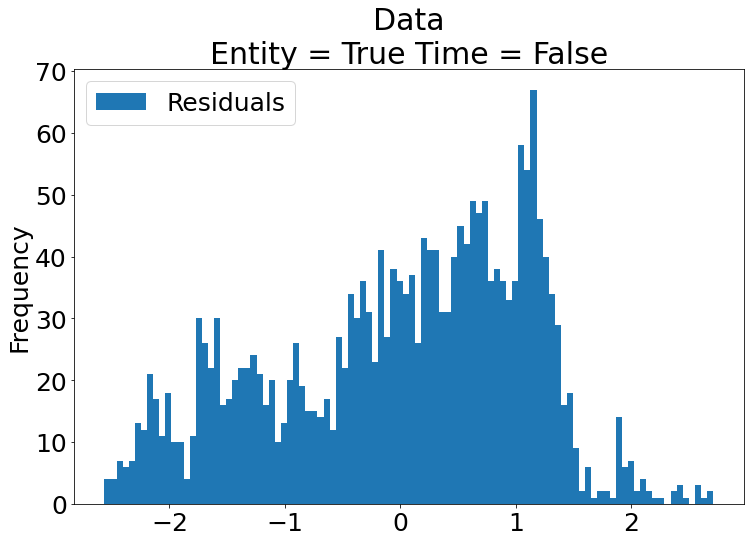

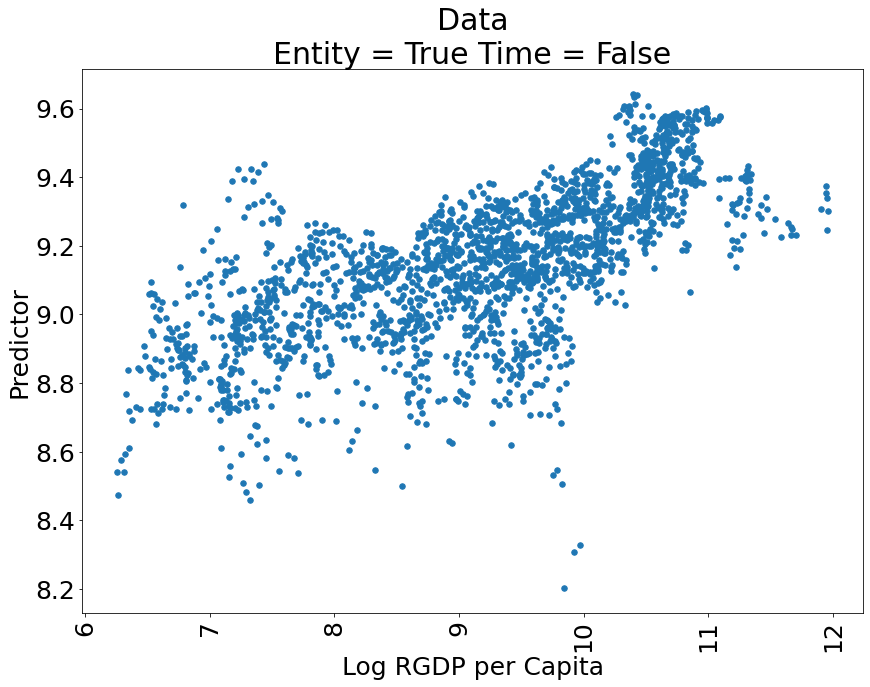

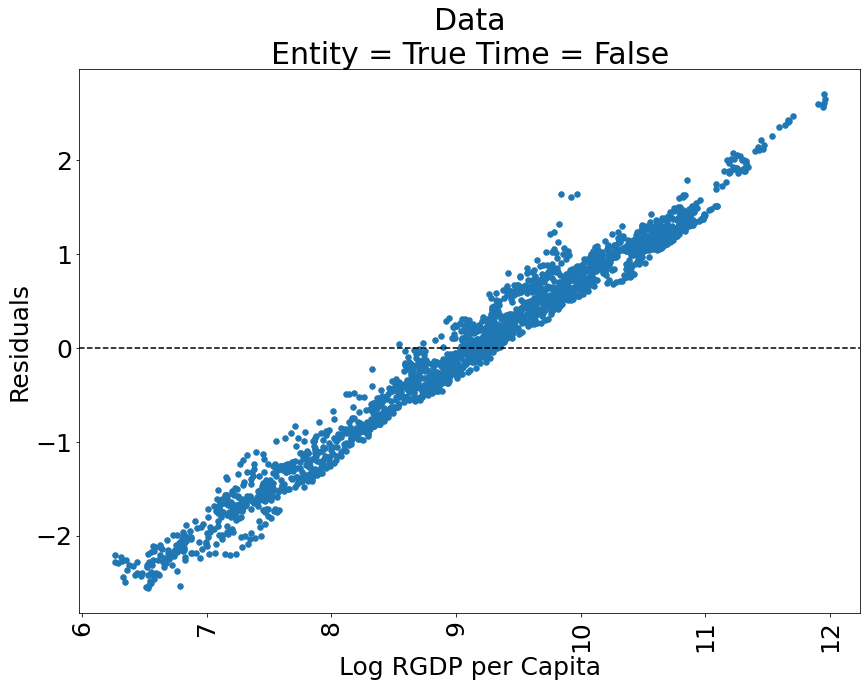

Data
Entity = False
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.6158
Estimator:                    PanelOLS   R-squared (Between):              0.6174
No. Observations:                 2116   R-squared (Within):              -1.5152
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.6141
Time:                         16:11:23   Log-likelihood                   -2432.0
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      671.70
Entities:                          162   P-value                           0.0000
Avg Obs:                        13.062   Distribution:                  F(5,2095)
Min Obs:                        0.0000                                           
Max Obs:                        16.000   F-statistic (robust)

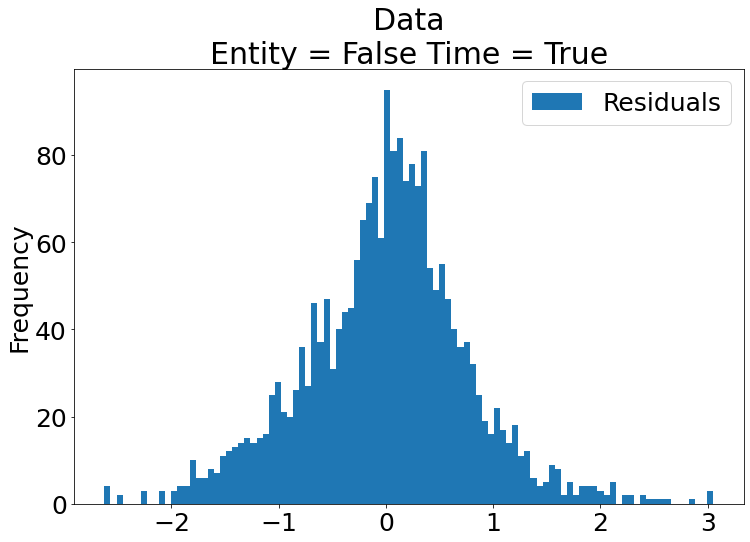

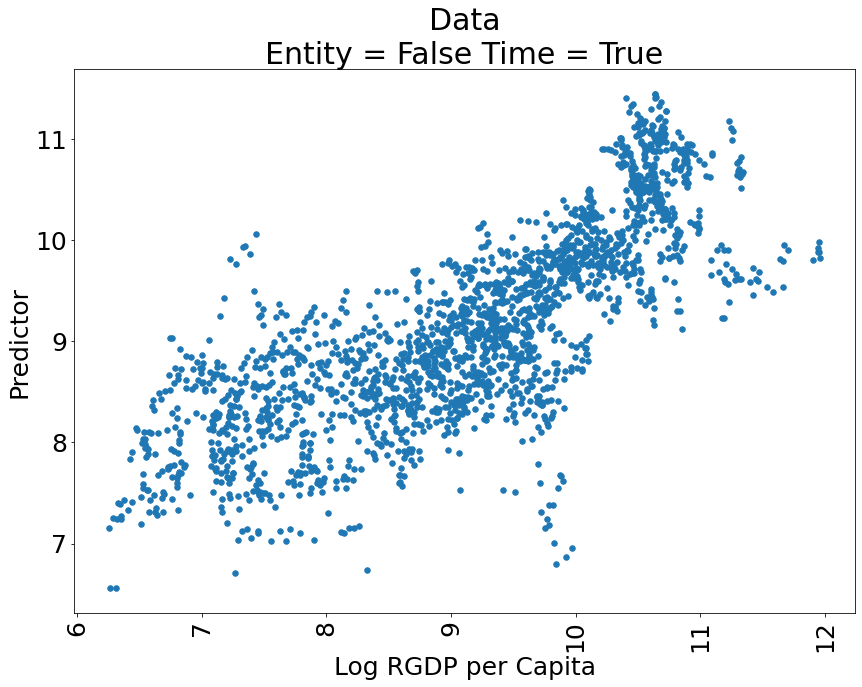

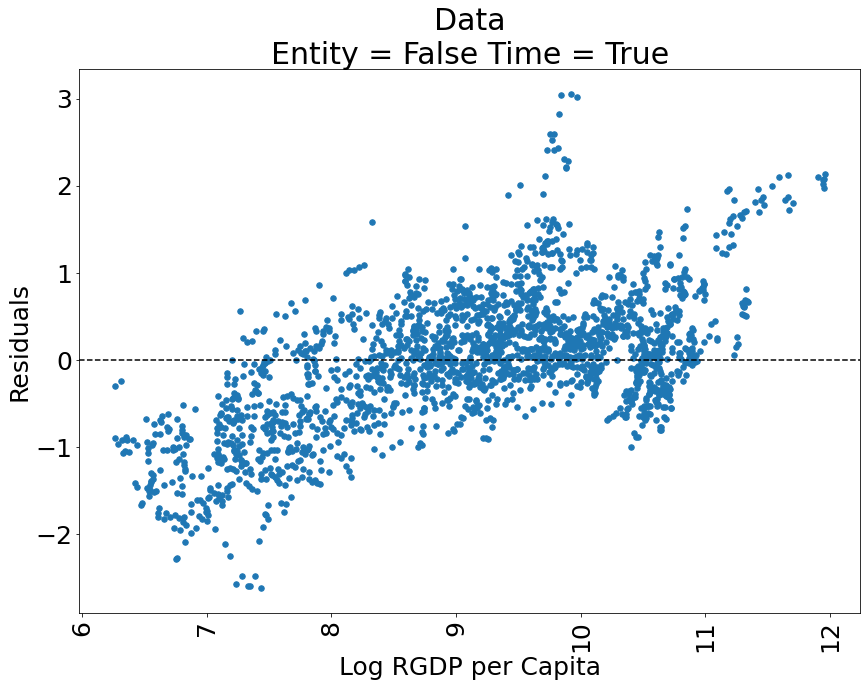

Data
Entity = False
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.6143
Estimator:                    PanelOLS   R-squared (Between):              0.6166
No. Observations:                 2116   R-squared (Within):              -1.4435
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.6143
Time:                         16:11:23   Log-likelihood                   -2439.1
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      672.23
Entities:                          162   P-value                           0.0000
Avg Obs:                        13.062   Distribution:                  F(5,2110)
Min Obs:                        0.0000                                           
Max Obs:                        16.000   F-statistic (robust

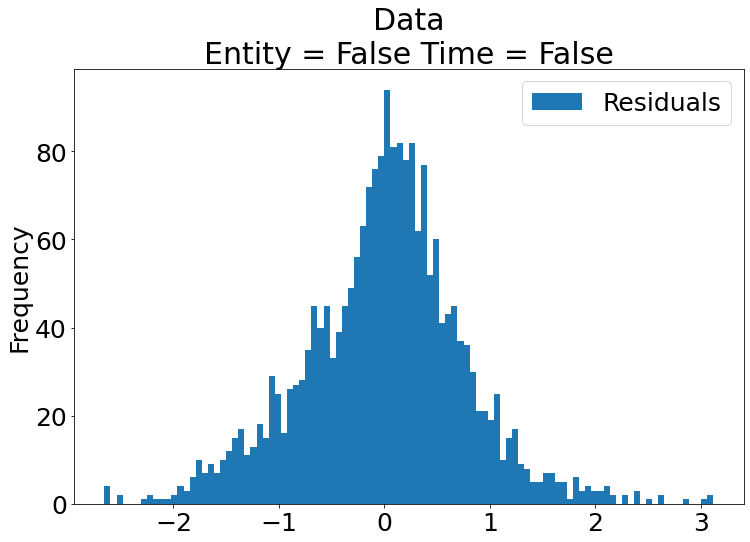

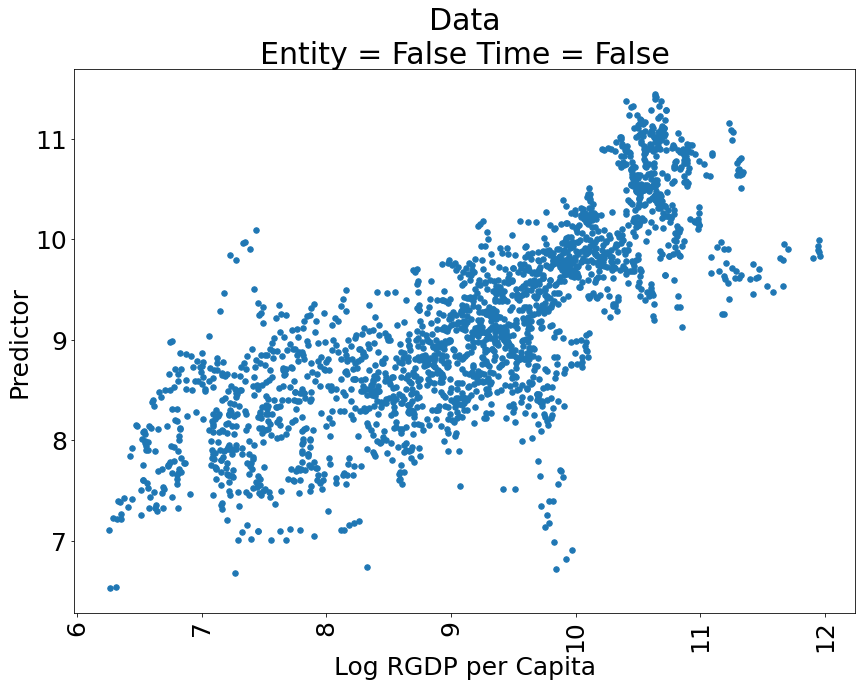

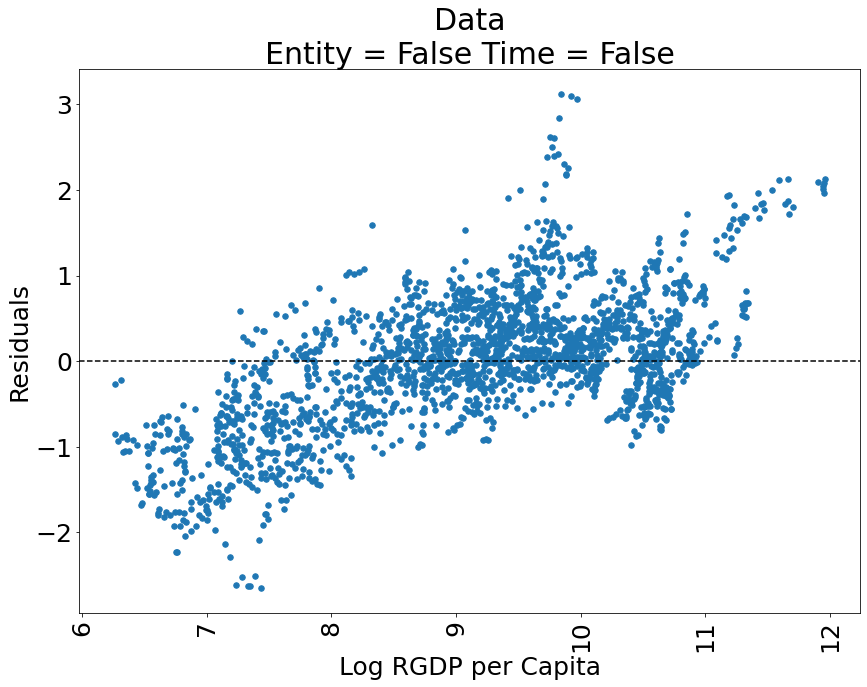

Diff Data
Entity = True
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0174
Estimator:                    PanelOLS   R-squared (Between):              0.0060
No. Observations:                 1969   R-squared (Within):               0.0167
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0120
Time:                         16:11:24   Log-likelihood                    3864.9
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      5.3184
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.154   Distribution:                  F(6,1802)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic

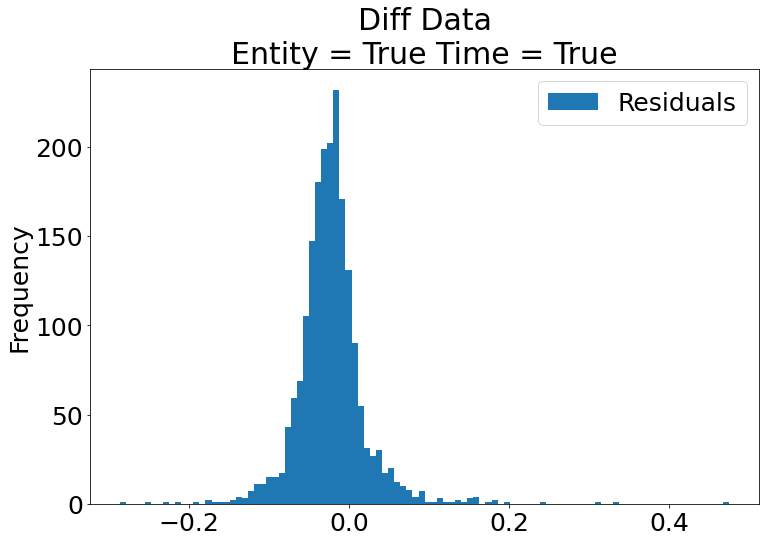

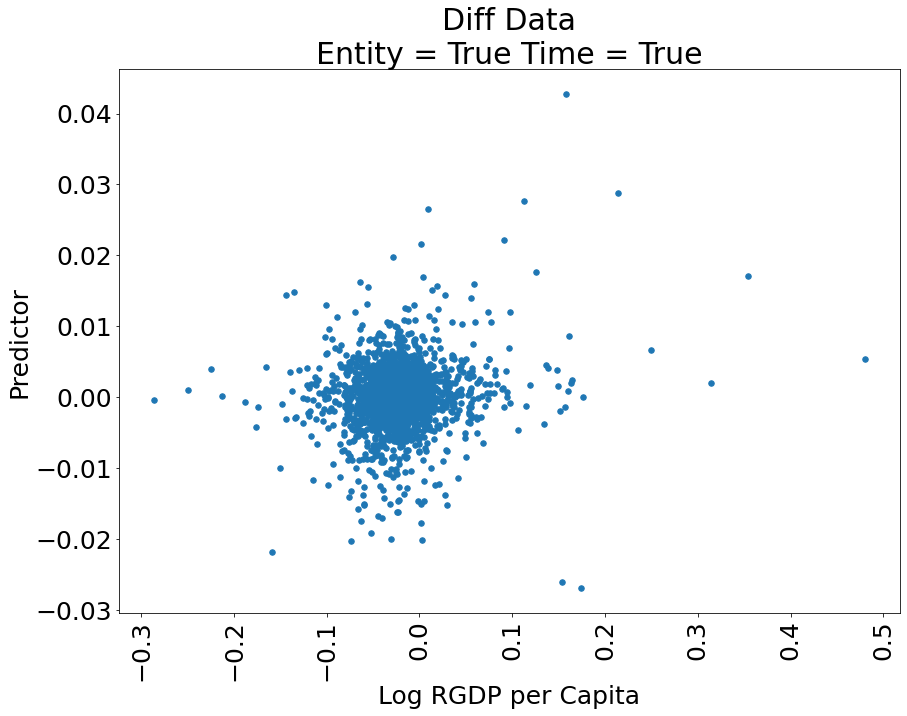

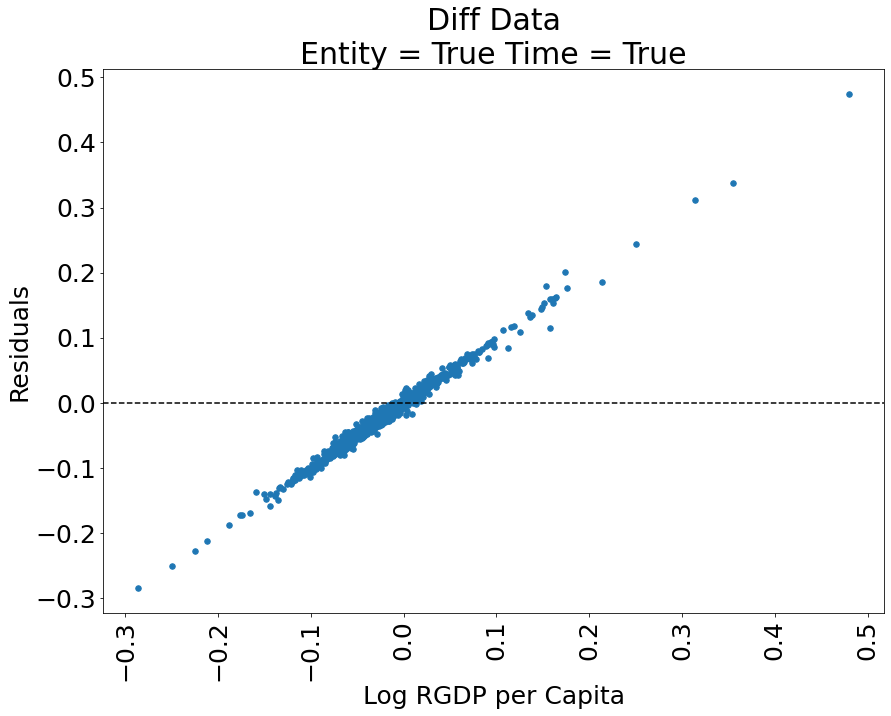

Diff Data
Entity = True
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0218
Estimator:                    PanelOLS   R-squared (Between):              0.0179
No. Observations:                 1969   R-squared (Within):               0.0218
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0209
Time:                         16:11:25   Log-likelihood                    3700.0
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      6.7604
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.154   Distribution:                  F(6,1816)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statisti

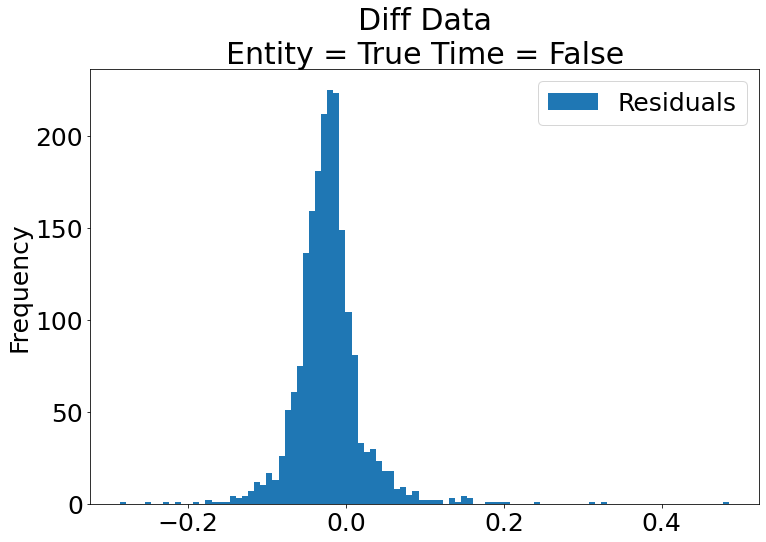

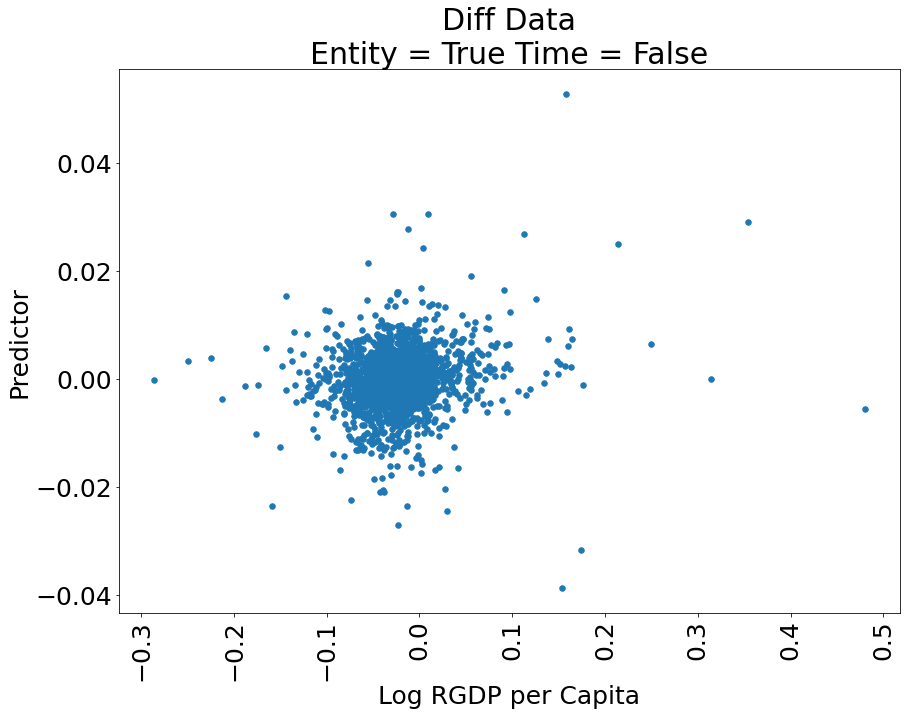

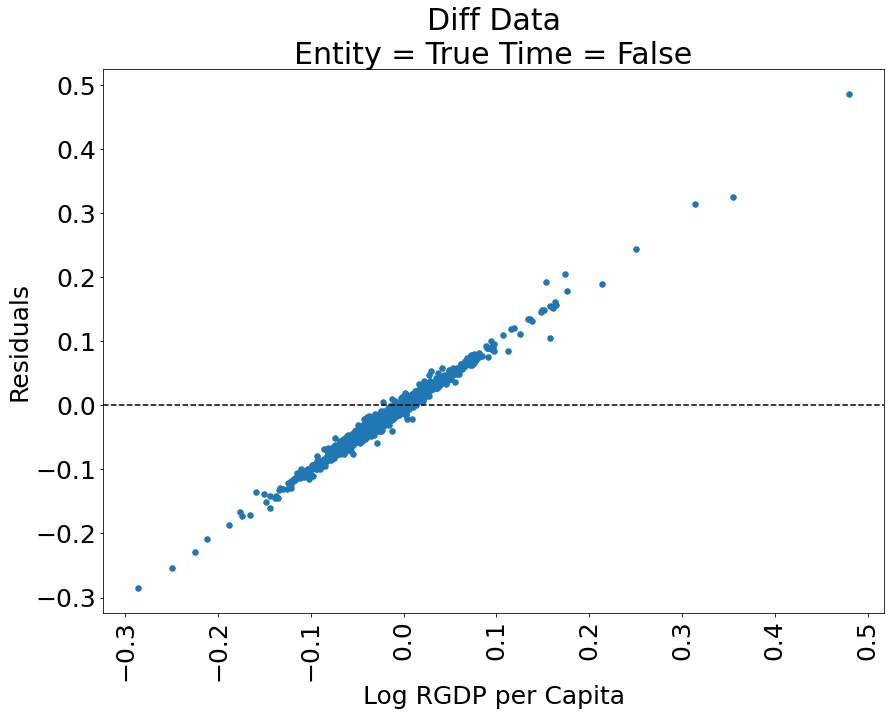

Diff Data
Entity = False
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0215
Estimator:                    PanelOLS   R-squared (Between):              0.0389
No. Observations:                 1969   R-squared (Within):               0.0173
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0335
Time:                         16:11:26   Log-likelihood                    3498.7
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      7.1502
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.154   Distribution:                  F(6,1948)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statisti

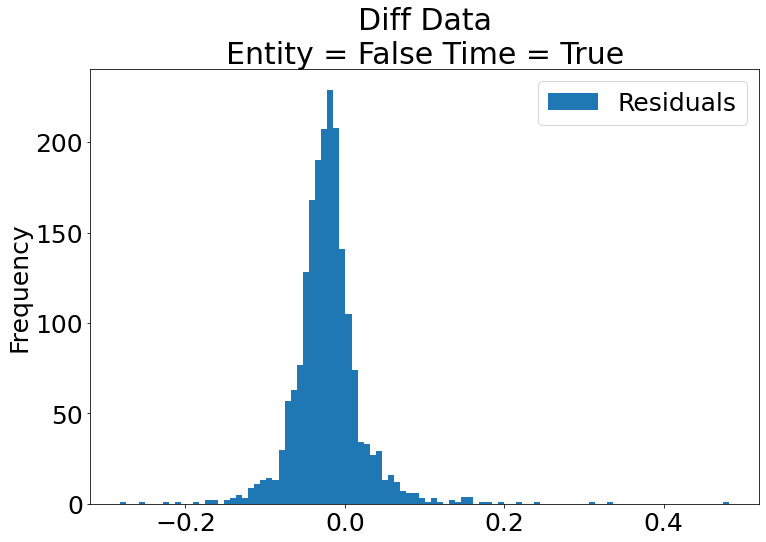

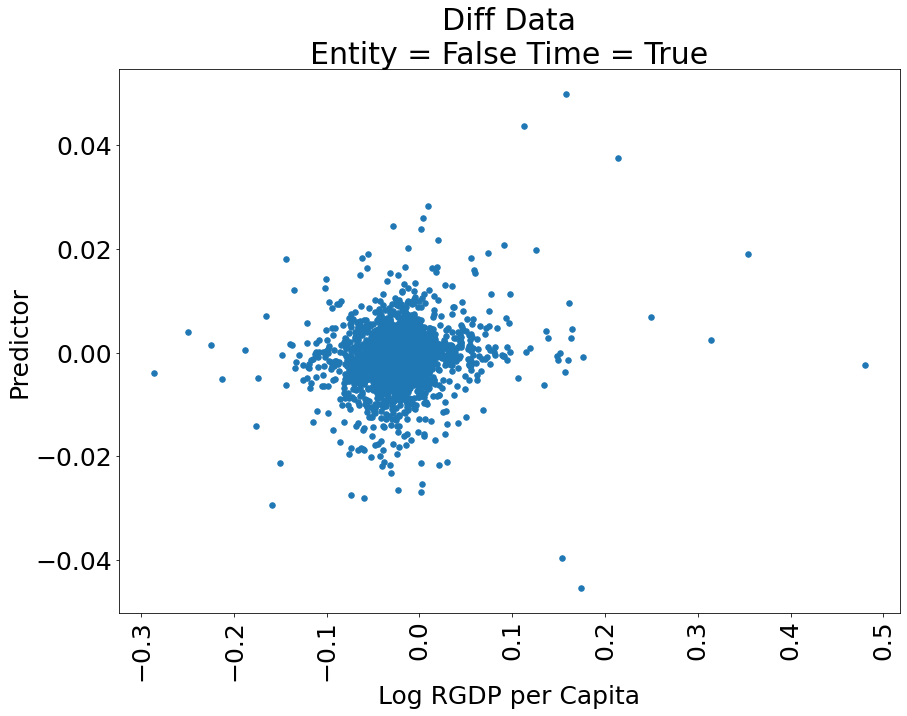

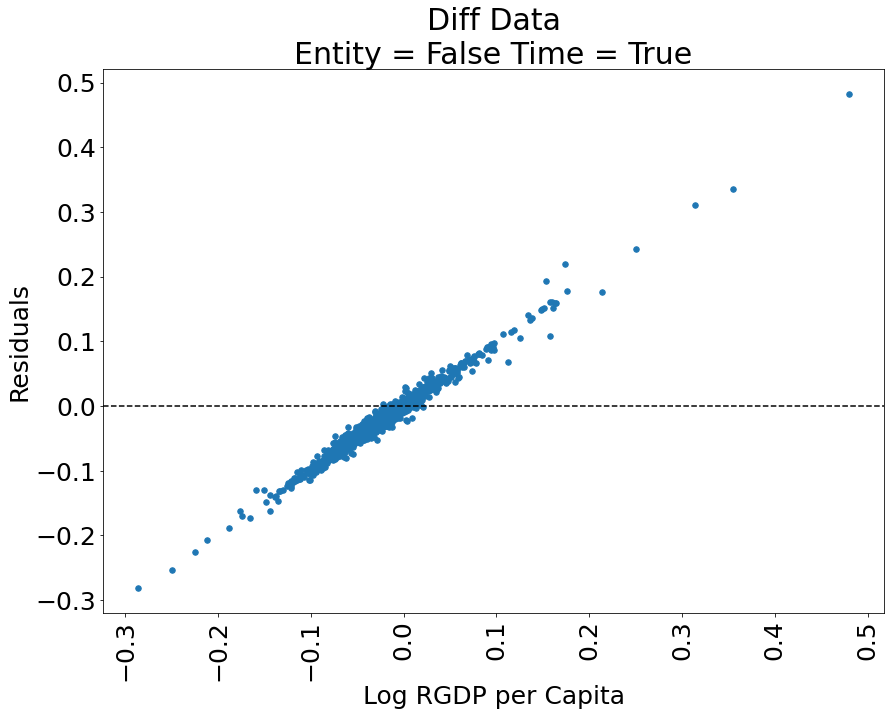

Diff Data
Entity = False
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP per Capita   R-squared:                        0.0921
Estimator:                    PanelOLS   R-squared (Between):              0.1336
No. Observations:                 1969   R-squared (Within):              -0.0327
Date:                 Mon, Nov 15 2021   R-squared (Overall):              0.0921
Time:                         16:11:27   Log-likelihood                    3225.0
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      33.191
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.154   Distribution:                  F(6,1963)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statist

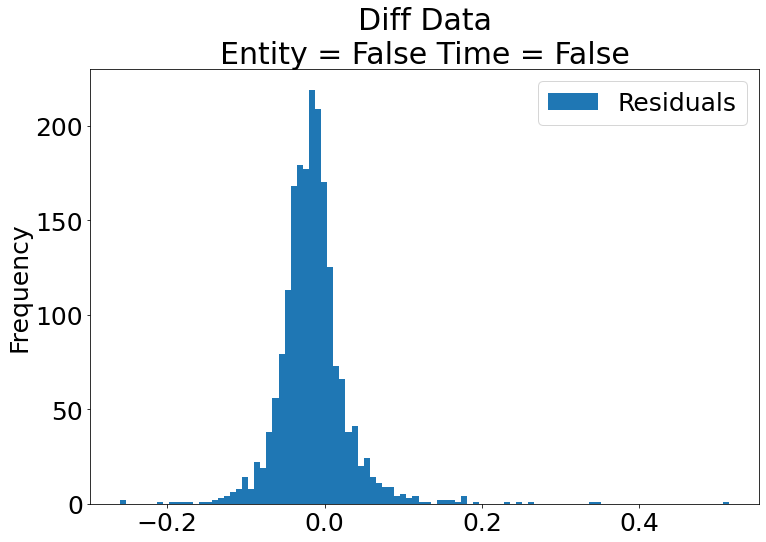

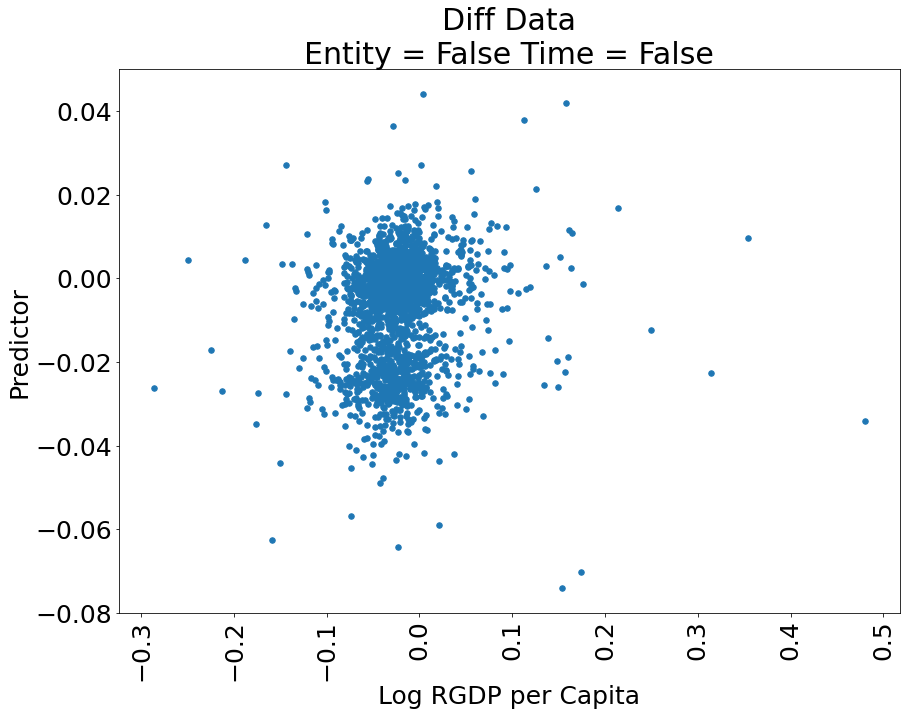

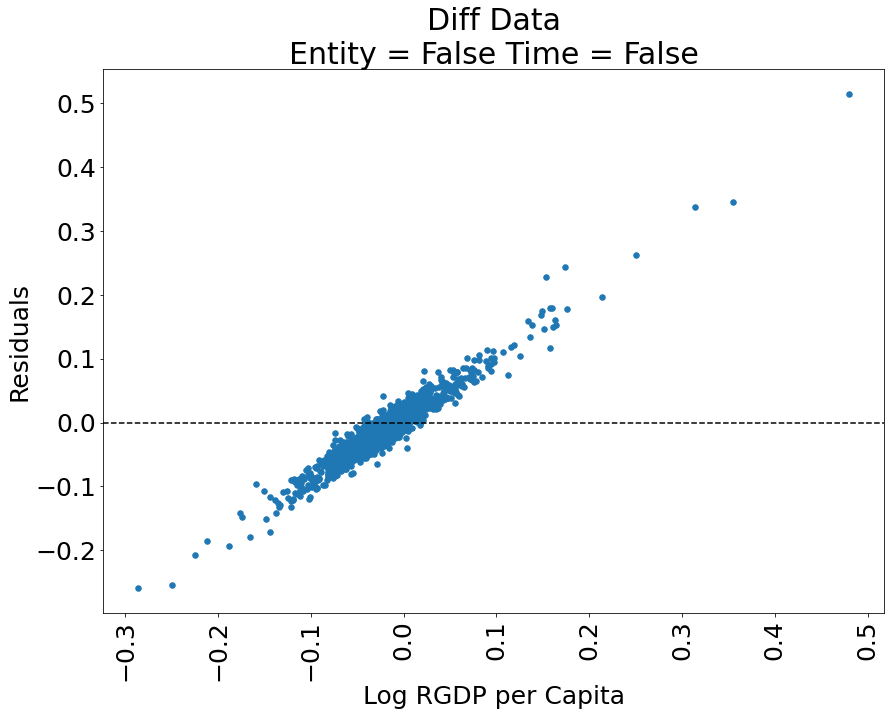

In [30]:
y_name = ["Log RGDP per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "isExcessMortality"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            ##X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

## Reflection on Homework Question

First I did some internet searches to surface a few ideas on what factors might improve a prediction of RDGP. Ideas related literacy, political corruption, and adult mortality were common hence why I chose to import data from the World Health Organization. I added in the data, but was the left to figure out what binary factor to add to the dataset. I settled on calling out deaths of 15 - 60 year olds exceeding 200 deaths per 1,000 as excessive mortality. I don't know if that is indeed excessive, but settled on that number after reviewing some countries in relation to the United States.

I could have spent more time exploring that data, but for the sake of simplicity and proceeding with the homework, I made my choices and moved on.

I followed the script a bit and things got a bit muddy for me when trying decide if and why were lagging and logging the data correctly. Plus, reading the OLS regression output, I studied it a bit and was trying to decipher why the addition of my excess mortality factor had only the narrowest of improvement on the R^2 value. First, i think without some real experience and meaningful domain expertise, my approach to interpretting a continuous variable and setting a binary/boolean value base on an arbitrary value will always reveal the novice.

I still feel unsure I'm properly interpreting what I'm reading. Second, it's possible the blogs and internet postings I read were inaccurately pointing to a country's adult mortality rate as being an important factor in predicting real GDP. Third, it's possible I lagged and logged data where I should not have done so; admittedly, the steps laid out follow a pattern that's familiar to Professor Caton, and I've noted to myself that the data wrangling procedures and sequence sometimes differs from how I'm inclined to approach the data. Finally, it's possible that I performed the steps correctly, and that the feature I created truly shows that adult mortality has little to do with predicting real GDP.